# <center> Sequential MUD estimation for ODE Systems </center>

___
<font color='blue'><center>**Carlos del-Castillo-Negrete, Rylan Spence**</center></font>
    <br>
    <center>University of Texas at Austin
    <br>
    carlos.delcastillo@utexas.edu, rylan.spence@utexas.edu</center>
___

- [***Parameter Estimation with Maximal Updated Densities***](https://arxiv.org/pdf/2212.04587.pdf) Pilosov, M., del-Castillo-Negrete, C., Yen, T. Y., Butler, T., & Dawson, C. (2022). Parameter Estimation with Maximal Updated Densities. arXiv preprint arXiv:2212.04587.
___


<cite id="e9b62"><a href="#zotero%7C11450669%2F7F6J6S7U">(Wicks &#38; Atkinson, 2017)</a></cite>


____

# Lotka-Volterra

## Mud Estimation example for Predator Prey model

The traditional predator prey model is given by the following system of ordinary differential equations:
    $$
    \begin{aligned}
    & \frac{d x}{d t}=\alpha x-\beta x y \\
    & \frac{d y}{d t}=\delta x y-\gamma y
    \end{aligned}
    $$
where

    - $x$ is the number of prey (for example, rabbits);
    - $y$ is the number of some predator (for example, foxes);
    - $\frac{d y}{d t}$ and $\frac{d x}{d t}$ represent the instantaneous growth rates of the two populations;
    - $t$ represents time;
    
The parameters of the problem $\lambda = [\alpha, \beta, \delta, \gamma]$ are positive real parameters describing the interaction of the two species:

    - $\lambda_0 = \alpha=$ growth rate of prey
    - $\lambda_1 = \beta$ = death rate of rabbits due to predatation from predators
    - $\lambda_2 = \delta=$ factor describing how many consumed prey create a new predator
    - $\lambda_3 = \gamma=$ natural death rate of predators


## Test Sample - 100

Realistic amount of samples we'd use in a large scale problem

In [2]:
import numpy as np
import seaborn as sns
from pydci.log import enable_log
from pydci.examples import lotka_volterra
import importlib

enable_log()

[07/05/23 13:12:50] INFO     Logger initialized                                                           ]8;id=932734;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=87002;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#78\78]8;;\

The LotkaVoleterra model allows us to define a model with a forward solver for simulating the predator-prey system.
For inputs to the class we have:

- `x0` - the time span of the simulation
- `lam_true` - the true parameters of the system
- `solve_ts` - the time step for the forward solver (uses `scipy.integrate.odient`)
- `sample_ts` - the time step for the measurement
- `measurement_noise` - the standard deviation of the measurement noise

We start by initializing the model, using default parameters for now


In [5]:
lvm_100 = lotka_volterra.LotkaVolterraModel(sample_ts=0.5)

[07/05/23 13:18:02] INFO     Drawing 100 from uniform at:                                              ]8;id=637896;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=845954;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#252\252]8;;\
                                     loc: [0.5   0.01  0.005 0.5  ]                                                
                                     scale: [1.   0.02 0.01 1.  ]                                                  

                    INFO     end_point: 49.50990198039608, [63.27133303 12.14744709]                   ]8;id=644338;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=713584;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.2s (500.79/


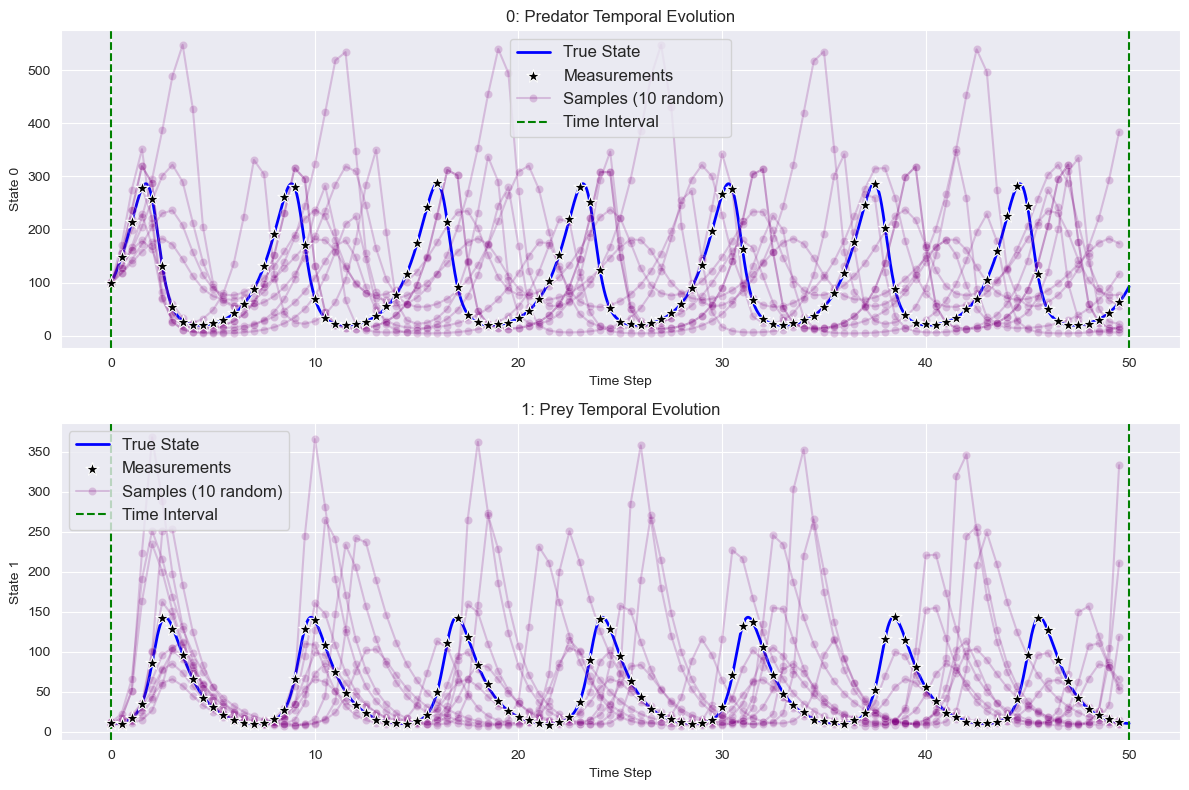

In [6]:
pi_in, samples = lvm_100.get_uniform_initial_samples(num_samples=100, scale=0.5)
res_100 = lvm_100.forward_solve(50, samples=samples)
lvm_100.plot_states()

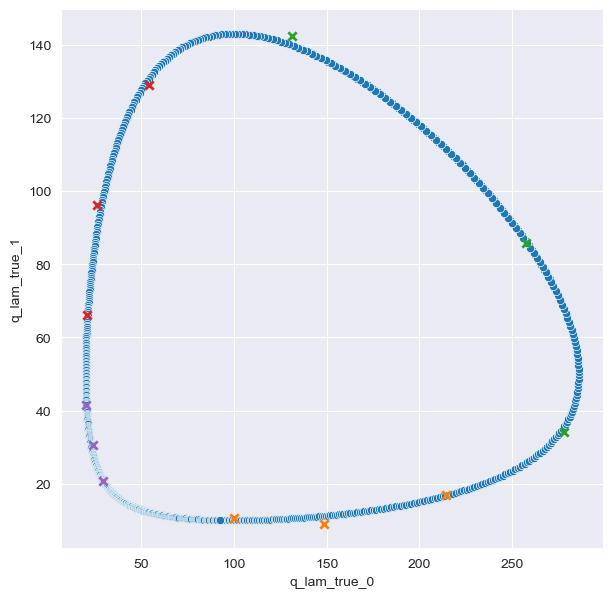

In [8]:
ax = lvm_100.plot_true_phase_space()
ax = lvm_100.plot_obs_phase_space(ax=ax, n_ints=4, int_size=3)

## Solving Using $Q_{PCA}$ Map

In [20]:
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib
importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
pca_prob = pcp.PCAMUDProblem(res_100['samples'], res_100['data'], lvm_100.measurement_noise, pi_in=pi_in)
pca_prob.solve(pca_components=[0], pca_mask=range(10))
pca_prob.result

[07/05/23 13:25:26] INFO     Computing PCA using 4 components                                  ]8;id=103766;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=524696;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [4.59317284 2.98695358 1.09148593 0.97319421]       ]8;id=425068;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=557101;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=814708;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=692565;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#204\204]8;;\

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  MUD_idx   
0  1.217289  3.540027   0.779008   0.020701   0.013316   1.184318        8  \

  pca_components      pca_mask  
0            [0]  range(0, 10)

NameError: name 'pca_it' is not defined

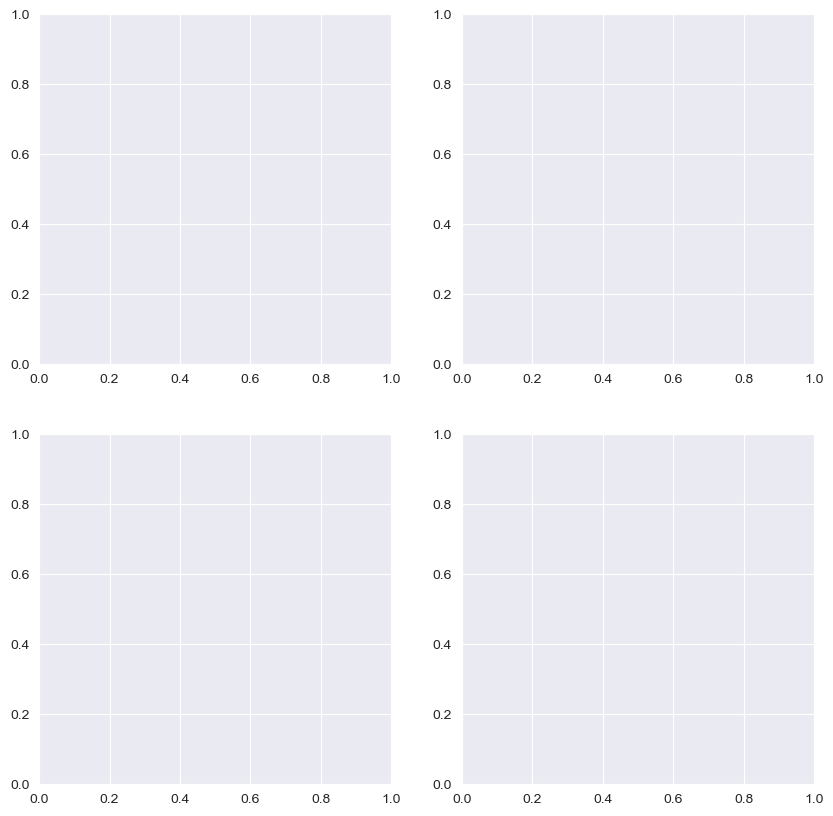

In [25]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    pca_it.plot_L(df=pca_it.state, lam_true=[lvm_100.lam_true], param_idx=i, ax=ax)

In [32]:
from pydci.utils import get_df
best_ts = get_df(lvm_100.samples[0].iloc[[pca_prob.mud_arg]], 'q_lam', 100)
best_ts

array([[101.1243921 ,  10.66352428, 145.50787693,  37.66656257,
         76.0102381 , 122.4312613 ,  21.3485455 ,  95.73105356,
         13.36129828,  47.66327798,  15.29965754,  22.8594362 ,
         23.30485487,  11.96124082,  40.02806448,   7.74229283,
         71.26665634,   7.588618  , 120.85708566,  15.31039903,
        137.39813277,  66.82926874,  45.26330363, 125.77106687,
         16.33013769,  75.40710858,  13.36378256,  36.28588856,
         17.46634668,  17.74886958,  28.17209368,   9.86656438,
         49.41191495,   7.22106538,  87.59811542,   8.86475072,
        138.51941498,  24.89558209, 105.09672661, 103.65599938,
         28.13141548, 110.78758711,  14.03331077,  58.05731933,
         14.20639959,  27.70256325,  20.48467245,  14.01399822,
         34.42362361,   8.43672734,  61.09701644,   7.21047887,
        106.40022679,  11.61164665, 145.73089925,  44.15652368,
         66.27002971, 125.87526998,  19.61040741,  90.04950727,
         13.26837443,  44.27537428,  15.

In [48]:
cols = [c for c in lvm_100.data[0].columns if c.startswith('q_lam_obs')]
np.linalg.norm(np.abs(best_ts - lvm_100.data[0][lvm_100.data[0]['sample_flag']][cols].to_numpy().ravel()))

670.6469259246239

## Iterating Over Data

In [90]:
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib
importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
pca_it = pcp.PCAMUDProblem(res_100['samples'], res_100['data'], lvm_100.measurement_noise, pi_in=pi_in)
pca_it.solve_it(pca_splits=[range(0, 10)], pca_components=[[0]])
pca_it.result

[04/29/23 03:17:17] INFO     Using data for pca: range(0, 10)                                  ]8;id=2444;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=144184;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#254\254]8;;\

                    INFO     Solving using pca components: [0]                                 ]8;id=96650;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=272795;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#256\256]8;;\

                    INFO     Computing PCA using 4 components                                  ]8;id=870879;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=96862;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [4.82818183 3.08521163 1.08641908 0.95610963]       ]8;id=418910;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=716285;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=722322;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=60430;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     |E(r) - 1| = 1.637992400215238 > 0.5 - Stopping                   ]8;id=437163;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=174153;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#271\271]8;;\

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  2.637992  2.941838   0.668068   0.021295    0.03061   0.795666  \

  pca_components      pca_mask  
0            [0]  range(0, 10)

In [87]:
pca_it.it_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  3.619865e+00  3.953916   1.296445   0.022941   0.042731   1.010208  \
0  1.056236e-15  3.864814   0.869692   0.019155   0.029652   1.046490   

  pca_components         pca_mask  
0            [0]    range(0, 100)  
0            [0]  range(100, 200)

/opt/conda/envs/dev/lib/python3.11/site-packages/scipy/stats/_kde.py:580: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/conda/envs/dev/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


ValueError: array must not contain infs or NaNs

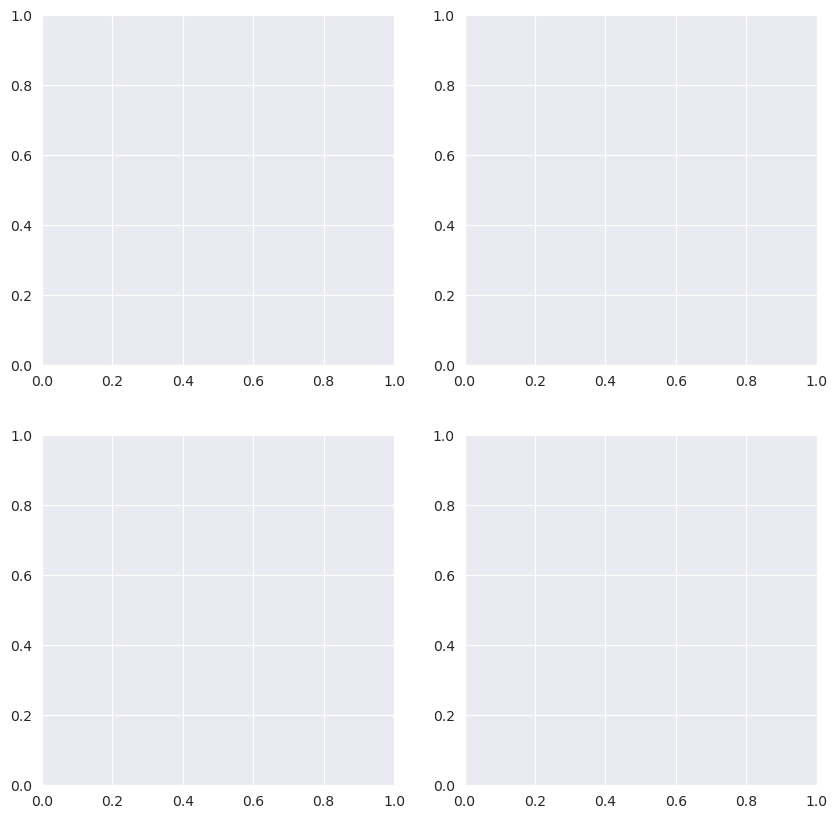

In [88]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    pca_it.plot_L(df=pca_it.state, lam_true=[lvm_100.lam_true], param_idx=i, ax=ax)

## Iterating over principal components

In [60]:
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib
importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
pca_it = pcp.PCAMUDProblem(res_100['samples'], res_100['data'], lvm_100.measurement_noise, pi_in=pi_in)
pca_it.solve_it(pca_components=[[0], [1], [2], [3]], exp_thresh=1.0)
pca_it.result

[04/28/23 05:00:26] INFO     Using data for pca: ALL                                           ]8;id=251003;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=695167;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#252\252]8;;\

                    INFO     Solving using pca components: [0]                                 ]8;id=475140;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=951298;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#254\254]8;;\

                    INFO     Computing PCA using 4 components                                  ]8;id=894718;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=450463;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [22.29516925 12.34652899  9.85753019  8.83644854]   ]8;id=787652;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=652238;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=88773;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=767373;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Updating weights                                                  ]8;id=704231;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=19437;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#270\270]8;;\

                    INFO     Solving using pca components: [1]                                 ]8;id=589030;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=924405;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#254\254]8;;\

                    INFO     Computing PCA using 4 components                                  ]8;id=938631;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=896659;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [22.29516925 12.34652899  9.85753019  8.83644854]   ]8;id=967152;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=873049;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=158408;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=756923;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=425745;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=51364;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Updating weights                                                  ]8;id=533302;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=222202;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#270\270]8;;\

                    INFO     Solving using pca components: [2]                                 ]8;id=902588;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=575298;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#254\254]8;;\

                    INFO     Computing PCA using 4 components                                  ]8;id=817614;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=486679;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [22.29516925 12.34652899  9.85753019  8.83644854]   ]8;id=463735;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=928449;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=628209;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=63152;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=687961;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=39150;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Updating weights                                                  ]8;id=922437;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=892251;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#270\270]8;;\

                    INFO     Solving using pca components: [3]                                 ]8;id=954214;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=582632;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#254\254]8;;\

                    INFO     Computing PCA using 4 components                                  ]8;id=259320;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=171763;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [22.29516925 12.34652899  9.85753019  8.83644854]   ]8;id=182425;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=667616;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=325193;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=927543;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=709580;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=104147;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     |E(r) - 1| = 3.0390986701869904 > 1.0 - Stopping                  ]8;id=774989;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=858330;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#266\266]8;;\

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  4.039099  1.626815   1.282646   0.380935   0.360781   0.053523  \

  pca_components pca_mask  
0            [3]     None

In [61]:
pca_it.it_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  4.038937e-01  4.273513   0.670148   0.230076   0.375417   0.111954  \
0  3.820587e-09  2.503708   1.007300   0.344150   0.377658   0.095992   
0  1.583827e-03  2.573737   0.898707   0.431708   0.568051   0.138748   
0  4.039099e+00  1.626815   1.282646   0.380935   0.360781   0.053523   

  pca_components pca_mask  
0            [0]     None  
0            [1]     None  
0            [2]     None  
0            [3]     None

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_0}$',
  '$\\pi^{in}_{\\lambda_0}$',
  '$\\lambda^{\\dagger}_0 = 1.1000$',
  '$\\lambda^{MUD}_0 = 1.2826$'])

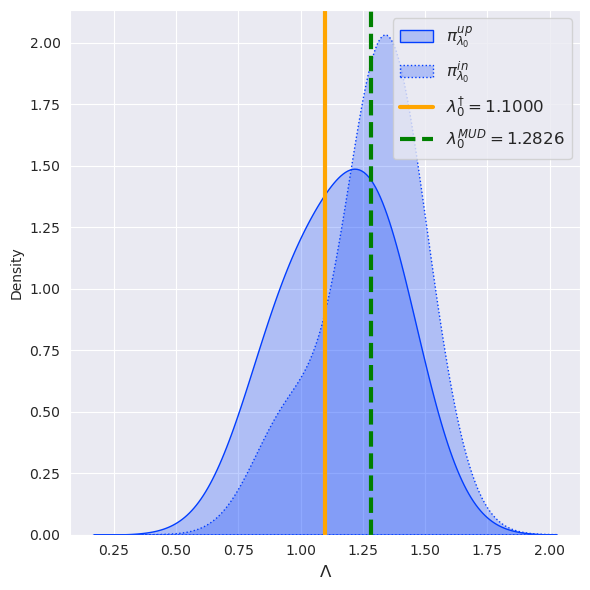

In [62]:
pca_it.plot_L(df=pca_it.state, lam_true=[lvm_100.lam_true], param_idx=0)

In [124]:
pca_it.solve_it(pca_masks=[np.arange(10), masks=[[0], [1], [2], [3]], exp_thresh=1e10)
pca_it.result

TypeError: PCAMUDProblem.solve_it() got an unexpected keyword argument 'pca_mask'

In [118]:
pca_it.state.iloc[[min_l2_index]]

weight        pi_in     pi_pr    pi_obs     ratio        pi_up   
16  1.147966  2452.393122  0.130301  0.362824  2.784509  7839.130673  \

     q_lam_0   q_lam_1   q_lam_2   q_lam_3  ...  q_lam_98  q_lam_99     lam_0   
16  1.817604  3.736494  1.508154  2.711147  ...  3.114182  1.423464  1.073288  \

       lam_1     lam_2     lam_3   q_pca_0   q_pca_1   q_pca_2   q_pca_3  
16  0.392994  0.488833  0.105227 -0.084816  0.325597  1.043066  0.435659  

[1 rows x 114 columns]

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_3}$',
  '$\\pi^{in}_{\\lambda_3}$',
  '$\\lambda^{\\dagger}_3 = 0.1000$',
  '$\\lambda^{MUD}_3 = 0.1008$'])

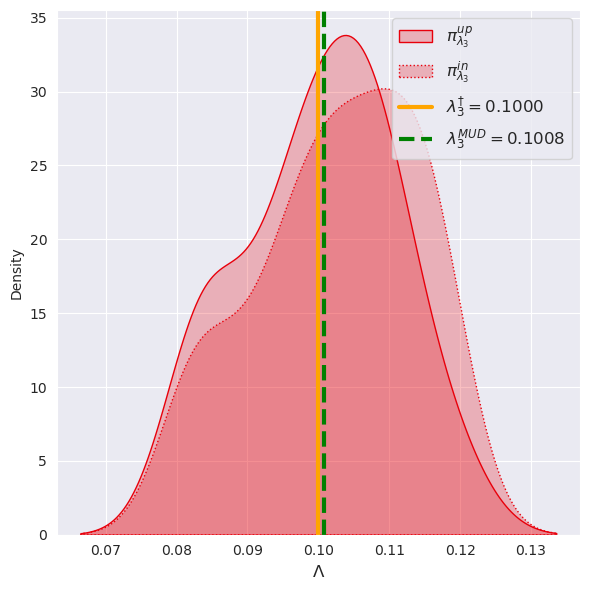

In [122]:
pca_it.plot_L(df=pca_it.state, lam_true=[lvm_100.lam_true], param_idx=3)

## Large Sample Size - 10K

In [65]:
import numpy as np
from pydci.log import enable_log
from pydci.examples import lotka_volterra
import importlib
importlib.reload(lotka_volterra)

enable_log()

lvm_10k = lotka_volterra.LotkaVolteraModel(sample_ts=1)
pi_in, samples = lvm_10k.get_uniform_initial_samples(num_samples=10000, scale=0.2)
res_10k = lvm_10k.forward_solve(50, samples=samples)

[04/28/23 03:38:56] INFO     Logger initialized                                                           ]8;id=627556;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=519011;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Drawing 10000 from uniform at:                                            ]8;id=629240;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=426740;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#253\253]8;;\
                                     loc: [0.88 0.32 0.4  0.08]                                                    
                                     scale: [0.44 0.16 0.2  0.04]                                                  

[04/28/23 03:38:57] INFO     end_point: 49.098196392785574, [4.7775051  1.11555665]                    ]8;id=846723;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=901429;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 10000/10000 [100%] in 33.8s (29


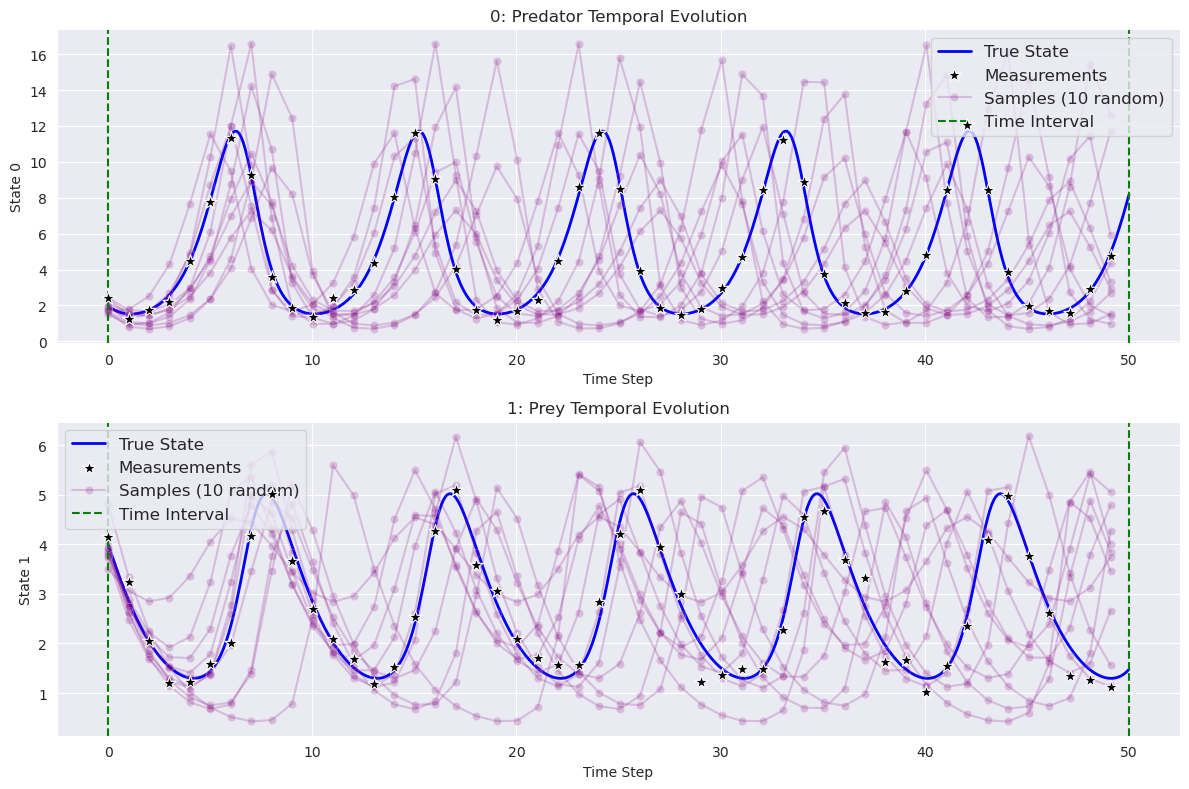

In [66]:
lvm_10k.plot_states()

## Solving Using $Q_{PCA} Map

In [38]:
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib
importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
pca_it = pcp.PCAMUDProblem(res_10k['samples'], res_10k['data'], lvm_10k.measurement_noise, pi_in=pi_in)
pca_it.solve()
pca_it.result

[04/28/23 03:16:22] INFO     Computing PCA using 4 components                                  ]8;id=193679;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=859608;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [30.07931626 26.68142425 17.81091355  8.02809712]   ]8;id=668938;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=289509;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=225708;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=476782;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=822542;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=329232;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  1.128055  3.652351   0.921662   0.402936   0.440278   0.095906  \

  pca_components  
0            [0]

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_0}$',
  '$\\pi^{in}_{\\lambda_0}$',
  '$\\lambda^{MUD}_0 = 1.0624$'])

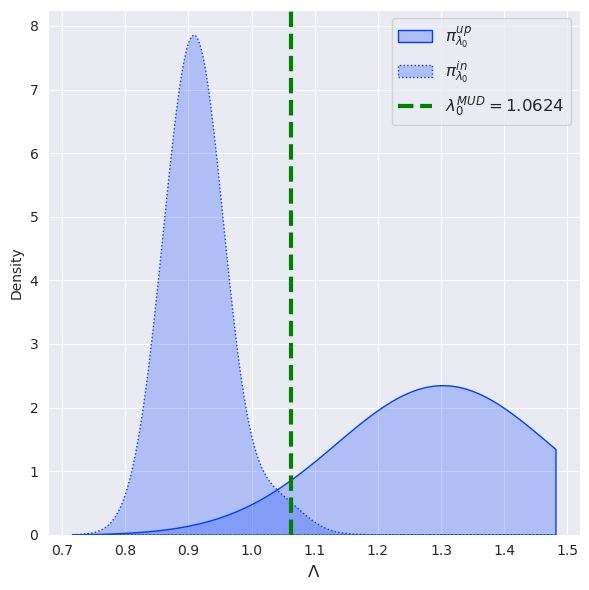

In [41]:
pca_it.plot_L(df=pca_it.state)

In [39]:
pca_it.solve_it(masks=[[0], [1], [2]])
pca_it.result

[04/28/23 03:16:23] INFO     Soling using pca components: [0]                                  ]8;id=917885;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=8158;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#250\250]8;;\

                    INFO     Computing PCA using 4 components                                  ]8;id=113025;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=543966;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [30.07931626 26.68142425 17.81091355  8.02809712]   ]8;id=359648;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=230806;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=460139;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=239406;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Updating weights                                                  ]8;id=200644;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=786617;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#264\264]8;;\

                    INFO     Soling using pca components: [1]                                  ]8;id=806443;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=631192;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#250\250]8;;\

                    INFO     Computing PCA using 4 components                                  ]8;id=179900;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=82310;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [30.07931626 26.68142425 17.81091355  8.02809712]   ]8;id=294565;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=435323;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=971033;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=377488;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=637200;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=883132;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     |E(r) - 1| = 1.0 > 0.5 - Stopping                                 ]8;id=422355;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=252682;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#261\261]8;;\

e_r         kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  3.822799e-25  15.866231   1.062383   0.406493   0.522289   0.112455  \

  pca_components mask  
0            [1]  [1]

In [40]:
pca_it.pca_states

weight         pi_obs         pi_pr          ratio          pi_up   
0    1.000000e+00  4.349513e-236  6.384610e-03  6.812496e-234  8.064320e-231  \
1    1.000000e+00   0.000000e+00  5.435479e-03   0.000000e+00   0.000000e+00   
2    1.000000e+00  8.225263e-177  5.293684e-03  1.553788e-174  2.572753e-171   
3    1.000000e+00   0.000000e+00  5.435539e-03   0.000000e+00   0.000000e+00   
4    1.000000e+00   1.204291e-18  5.624985e-03   2.140967e-16   2.324742e-13   
..            ...            ...           ...            ...            ...   
95   7.209971e-05  1.000467e-184  6.358264e-07  1.573491e-178  1.792411e-181   
96  1.690064e-208   0.000000e+00  1.324797e-06   0.000000e+00   0.000000e+00   
97   0.000000e+00   0.000000e+00  5.130311e-02   0.000000e+00   0.000000e+00   
98   3.776803e+01   0.000000e+00  4.750425e-02   0.000000e+00   0.000000e+00   
99   1.761367e-03  1.195225e-112  1.159164e-06  1.031109e-106  7.009882e-107   

    iteration pca_components  
0           0            [0]  
1           0            [0]  
2           0            [0]  
3           0            [0]  
4           0            [0]  
..        ...            ...  
95          1            [1]  
96          1            [1]  
97          1            [1]  
98          1            [1]  
99          1            [1]  

[200 rows x 7 columns]

In [14]:
pca_it.pca_states

iteration  weight         pi_obs     pi_pr          ratio          pi_up
0          0     1.0  4.349513e-236  0.006385  6.812496e-234  8.064320e-231
1          0     1.0   0.000000e+00  0.005435   0.000000e+00   0.000000e+00
2          0     1.0  8.225263e-177  0.005294  1.553788e-174  2.572753e-171
3          0     1.0   0.000000e+00  0.005436   0.000000e+00   0.000000e+00
4          0     1.0   1.204291e-18  0.005625   2.140967e-16   2.324742e-13
..       ...     ...            ...       ...            ...            ...
95         0     1.0   4.119214e-07  0.005713   7.209971e-05   1.034000e-01
96         0     1.0  1.079812e-210  0.006389  1.690064e-208  3.180807e-205
97         0     1.0   0.000000e+00  0.005430   0.000000e+00   0.000000e+00
98         0     1.0   2.193579e-01  0.005808   3.776803e+01   6.590671e+04
99         0     1.0   1.008966e-05  0.005728   1.761367e-03   2.498238e+00

[100 rows x 6 columns]

[04/27/23 23:44:33] INFO     Logger initialized                                                           ]8;id=9718;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=917202;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

<Axes: xlabel='num_data', ylabel='e_r'>

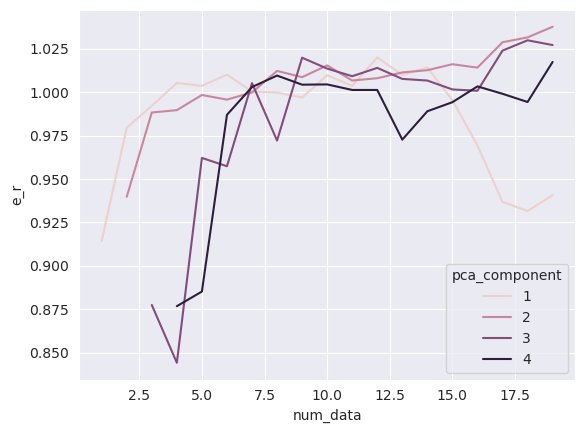

In [105]:
from pydci.log import disable_log
disable_log()

results = []
for i in range(1, len(res['data'])):
    for j in range(0, 4 if 4 <= i else i):
        pca2.solve_2(pca_mask=range(i), components_mask=[j])
        r = pca2.result.copy()
        r['num_data'] = i
        r['pca_component'] = j + 1
        results.append(r)
enable_log()
results = pd.concat(results)

import seaborn as sns

sns.lineplot(results, x='num_data', y='e_r', hue='pca_component')

In [98]:
results[results['num_data'] == 35]

Empty DataFrame
Columns: [e_r, kl, lam_MUD_0, lam_MUD_1, lam_MUD_2, lam_MUD_3, pca_components, num_data, pca_component]
Index: []

<Axes: xlabel='num_data', ylabel='e_r'>

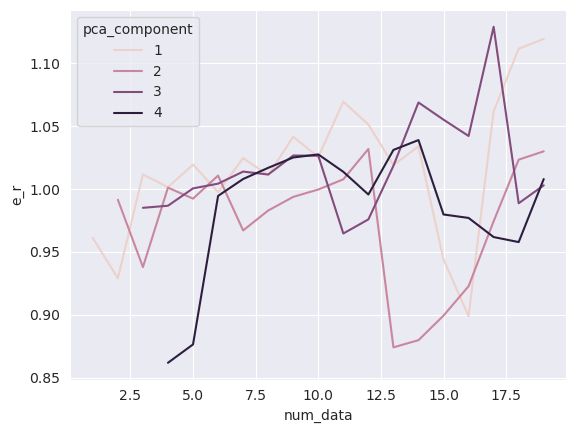

# Ensemble Studies



## Effect of incorporating more data into $Q_{PCA}$ map 

Lets iterate between using some to all data in the pca map.
Compare evolution of E(r) and the accuracy of our MUD estimate.

In [54]:
N_samples = [10, 100]
tries_per = 5
np.repeat(N_samples, tries_per)

array([ 10,  10,  10,  10,  10, 100, 100, 100, 100, 100])

In [99]:
import numpy as np
import seaborn as sns
from pydci.log import enable_log, disable_log, logger
from pydci.examples import lotka_volterra
import importlib
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib
import pandas as pd


from pydci.log import disable_log
disable_log()

importlib.reload(pcp)
importlib.reload(lotka_volterra)



enable_log()

N_samples = [100]
tries_per = 5
N_samples = np.repeat(N_samples, tries_per)
results = []
lvms = []

for k in N_samples:
    logger.info(f'Solving forward model using {k} samples')
    lvm = lotka_volterra.LotkaVolterraModel(sample_ts=1)
    pi_in, samples = lvm.get_uniform_initial_samples(num_samples=k, scale=0.5)
    res = lvm.forward_solve(50, samples=samples)

    # NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
    pca2 = pcp.PCAMUDProblem(res['samples'], res['data'], lvm.measurement_noise)

    disable_log()
    logger.info('Scanning through number of data points and principal components')
    for i in range(1, len(res['data']), 2):
        for j in range(0, 4 if 4 <= i else i):
            pca2.solve(pca_mask=range(i), pca_components=[j])
            r = pca2.result.copy()
            r['num_data'] = i
            r['pca_component'] = j + 1
            r['num_samples'] = k
            results.append(r)
    enable_log()
    
res_df = pd.concat(results)

[04/29/23 03:18:34] INFO     Logger initialized                                                           ]8;id=881821;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=641335;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

[04/29/23 03:18:35] INFO     Solving forward model using 100 samples                               ]8;id=474422;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=378568;file:///tmp/ipykernel_729337/3300661499.py#28\28]8;;\

                    INFO     Drawing 100 from uniform at:                                              ]8;id=230173;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=661547;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#252\252]8;;\
                                     loc: [0.5   0.01  0.015 0.5  ]                                                
                                     scale: [1.   0.02 0.03 1.  ]                                                  

                    INFO     end_point: 49.00980196039208, [96.14308674  6.9768474 ]                   ]8;id=209566;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=404156;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.7s (150.54/


                    INFO     Scanning through number of data points and principal components       ]8;id=596077;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=815744;file:///tmp/ipykernel_729337/3300661499.py#37\37]8;;\

[04/29/23 03:18:37] INFO     Logger initialized                                                           ]8;id=111637;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=697916;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Solving forward model using 100 samples                               ]8;id=874648;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=673542;file:///tmp/ipykernel_729337/3300661499.py#28\28]8;;\

                    INFO     Drawing 100 from uniform at:                                              ]8;id=500121;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=693087;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#252\252]8;;\
                                     loc: [0.5   0.01  0.015 0.5  ]                                                
                                     scale: [1.   0.02 0.03 1.  ]                                                  

                    INFO     end_point: 49.00980196039208, [98.32702066  9.97009757]                   ]8;id=610522;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=589994;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.7s (141.03/


[04/29/23 03:18:38] INFO     Scanning through number of data points and principal components       ]8;id=264673;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=280905;file:///tmp/ipykernel_729337/3300661499.py#37\37]8;;\

[04/29/23 03:18:39] INFO     Logger initialized                                                           ]8;id=68476;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=795970;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Solving forward model using 100 samples                               ]8;id=260435;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=26023;file:///tmp/ipykernel_729337/3300661499.py#28\28]8;;\

                    INFO     Drawing 100 from uniform at:                                              ]8;id=186872;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=76455;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#252\252]8;;\
                                     loc: [0.5   0.01  0.015 0.5  ]                                                
                                     scale: [1.   0.02 0.03 1.  ]                                                  

                    INFO     end_point: 49.00980196039208, [97.66646508  9.1199603 ]                   ]8;id=646979;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=848730;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.7s (142.94/


[04/29/23 03:18:40] INFO     Scanning through number of data points and principal components       ]8;id=437488;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=177679;file:///tmp/ipykernel_729337/3300661499.py#37\37]8;;\

[04/29/23 03:18:42] INFO     Logger initialized                                                           ]8;id=258091;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=161691;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Solving forward model using 100 samples                               ]8;id=65754;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=263678;file:///tmp/ipykernel_729337/3300661499.py#28\28]8;;\

                    INFO     Drawing 100 from uniform at:                                              ]8;id=38065;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=691720;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#252\252]8;;\
                                     loc: [0.5   0.01  0.015 0.5  ]                                                
                                     scale: [1.   0.02 0.03 1.  ]                                                  

                    INFO     end_point: 49.00980196039208, [95.48082667  9.62932576]                   ]8;id=999981;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=545755;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.7s (150.61/


                    INFO     Scanning through number of data points and principal components       ]8;id=28035;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=524717;file:///tmp/ipykernel_729337/3300661499.py#37\37]8;;\

[04/29/23 03:18:44] INFO     Logger initialized                                                           ]8;id=955145;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=156208;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Solving forward model using 100 samples                               ]8;id=309622;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=682632;file:///tmp/ipykernel_729337/3300661499.py#28\28]8;;\

                    INFO     Drawing 100 from uniform at:                                              ]8;id=827237;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=151796;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#252\252]8;;\
                                     loc: [0.5   0.01  0.015 0.5  ]                                                
                                     scale: [1.   0.02 0.03 1.  ]                                                  

                    INFO     end_point: 49.00980196039208, [95.23211285  9.50679399]                   ]8;id=486760;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=233649;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.7s (142.36/


[04/29/23 03:18:45] INFO     Scanning through number of data points and principal components       ]8;id=435154;file:///tmp/ipykernel_729337/3300661499.py\3300661499.py]8;;\:]8;id=587357;file:///tmp/ipykernel_729337/3300661499.py#37\37]8;;\

[04/29/23 03:18:46] INFO     Logger initialized                                                           ]8;id=971684;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=891425;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

In [100]:
res_df

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0   9.927267e-01  0.006373   0.727959   0.021386   0.037362   0.792540  \
0   4.425643e-02  3.933808   0.708610   0.016835   0.031353   1.378861   
0   1.638602e-01  3.135992   0.851387   0.021080   0.028347   0.948836   
0   1.497404e-02  4.480160   1.067897   0.014743   0.032050   0.986802   
0   1.590615e+00  4.156658   0.710974   0.025443   0.033498   0.897689   
..           ...       ...        ...        ...        ...        ...   
0   4.148122e-23  4.043052   1.222546   0.018770   0.034428   1.366241   
0   3.738840e-04  4.308935   0.530713   0.021075   0.037953   1.435401   
0   1.897126e+00  3.618243   1.165994   0.011413   0.037627   0.630303   
0   1.713874e-02  4.106051   1.077838   0.023863   0.025056   0.557478   
0   1.067442e-02  4.450800   0.908429   0.021479   0.022220   1.453783   

   pca_components      pca_mask  num_data  pca_component  num_samples  
0             [0]   range(0, 1)         1              1          100  
0             [0]   range(0, 3)         3              1          100  
0             [1]   range(0, 3)         3              2          100  
0             [2]   range(0, 3)         3              3          100  
0             [0]   range(0, 5)         5              1          100  
..            ...           ...       ...            ...          ...  
0             [3]  range(0, 97)        97              4          100  
0             [0]  range(0, 99)        99              1          100  
0             [1]  range(0, 99)        99              2          100  
0             [2]  range(0, 99)        99              3          100  
0             [3]  range(0, 99)        99              4          100  

[980 rows x 11 columns]

<Axes: xlabel='num_data', ylabel='e_r'>

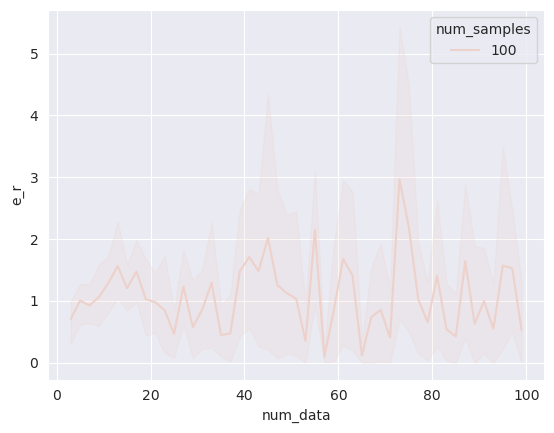

In [103]:
sns.set_style('darkgrid')
sns.lineplot(res_df[res_df['pca_components']=="[2]"], x='num_data', y='e_r', hue='num_samples')

In [135]:
pca2.state

weight        pi_in     pi_pr         pi_obs          ratio   
0       1.0  1379.286302  0.011632  3.060635e-239  2.631237e-237  \
1       1.0   727.018785  0.010252   0.000000e+00   0.000000e+00   
2       1.0   656.404684  0.011750  2.824713e-144  2.404007e-142   
3       1.0  1072.239355  0.012473   1.931990e-01   1.548972e+01   
4       1.0  2031.975840  0.012087   1.837573e-69   1.520272e-67   
..      ...          ...       ...            ...            ...   
995     1.0  1787.076651  0.010481   0.000000e+00   0.000000e+00   
996     1.0   602.278551  0.009064   0.000000e+00   0.000000e+00   
997     1.0  1903.195565  0.011756  1.088235e-179  9.256937e-178   
998     1.0  1209.001292  0.013573   3.000830e-03   2.210867e-01   
999     1.0  1943.480308  0.012082   7.952642e-70   6.582116e-68   

             pi_up   q_lam_0   q_lam_1   q_lam_2   q_lam_3  ...   q_lam_98   
0    3.629229e-234  2.024091  4.173599  2.079871  3.164973  ...   4.842730  \
1     0.000000e+00  2.135422  4.096436  1.641814  2.670757  ...   1.742117   
2    1.578001e-139  1.852371  4.024229  1.430373  2.786053  ...   1.446882   
3     1.660869e+04  2.013045  4.091574  1.707327  3.035511  ...   5.921392   
4     3.089156e-64  1.559559  3.757381  1.558311  2.511516  ...  10.251523   
..             ...       ...       ...       ...       ...  ...        ...   
995   0.000000e+00  1.990883  3.863677  1.488945  2.919757  ...   3.015502   
996   0.000000e+00  2.163001  3.836799  1.400986  2.875655  ...   1.707112   
997  1.761776e-174  1.622011  4.176117  1.169317  2.832718  ...   1.290793   
998   2.672941e+02  1.667786  3.997891  1.464867  2.920808  ...   1.859346   
999   1.279221e-64  2.288000  3.668308  1.848755  2.596876  ...  10.439256   

     q_lam_99     lam_0     lam_1     lam_2     lam_3    q_pca_0     q_pca_1   
0    5.798639  1.215260  0.326020  0.481202  0.102751  73.646576  -81.205137  \
1    1.999336  0.884509  0.342851  0.589107  0.089975 -77.613696  -38.469060   
2    2.332628  0.896033  0.341325  0.553301  0.118255 -54.706551  -57.577143   
3    1.758025  1.052293  0.342934  0.511214  0.118439  20.748054  -20.145562   
4    1.451118  1.077189  0.348551  0.539564  0.091468  56.423350   15.570070   
..        ...       ...       ...       ...       ...        ...         ...   
995  4.466819  1.028669  0.389832  0.433158  0.091677 -41.779788 -113.600552   
996  3.427077  1.124208  0.464940  0.426364  0.081992 -62.496073 -106.522079   
997  1.965483  1.042490  0.394203  0.511300  0.093632 -72.369050  -36.605065   
998  2.039825  1.013545  0.332481  0.488802  0.115625 -25.542226  -29.499164   
999  1.621980  1.064530  0.410358  0.535856  0.096225  36.572045   -7.411397   

       q_pca_2    q_pca_3  
0    -1.581418 -33.114356  
1    63.958539 -43.238240  
2    43.664225 -25.675471  
3    -7.478999   1.204239  
4   -24.067601 -17.739841  
..         ...        ...  
995  10.964865 -42.075718  
996  27.344345 -48.408703  
997  55.811449 -28.676096  
998  35.639640  -3.127276  
999 -27.780190 -17.786990  

[1000 rows x 114 columns]

<Axes: xlabel='num_data', ylabel='e_r'>

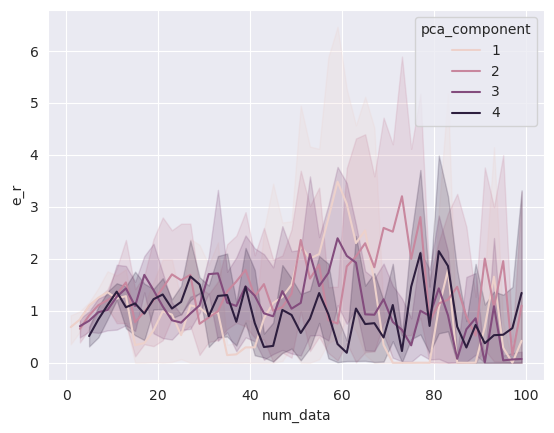

In [129]:
sns.lineplot(results[results['num_samples'] == 10], x='num_data', y='e_r', hue='pca_component')

<Axes: xlabel='num_data', ylabel='e_r'>

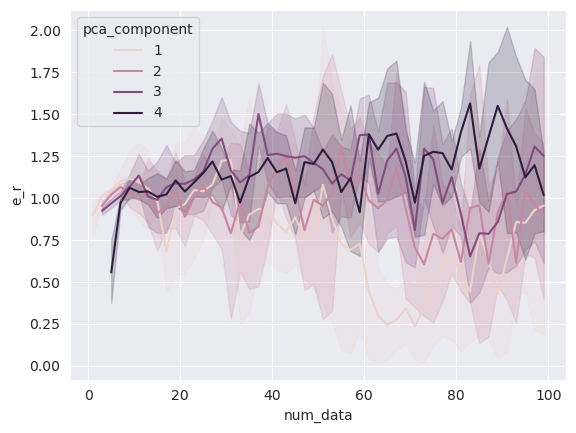

In [130]:
sns.lineplot(results[results['num_samples'] == 100], x='num_data', y='e_r', hue='pca_component')

In [ ]:
for i in range(len(res['data']

In [20]:
pca2.solve_2(pca_mask=[0, 1], components_mask=[1])
pca2.result

[04/27/23 23:20:16] INFO     Computing PCA using 2 components                                  ]8;id=529767;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=273089;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [1.26777866 0.95444356]                             ]8;id=59372;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=696482;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=490440;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=317795;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  0.997702  0.088266   1.211898   0.428621   0.600956   0.127816  \

  pca_components  
0            [1]

In [18]:
pca2.solve_2(components_mask=[0])
pca2.result

[04/27/23 23:19:17] INFO     Computing PCA using 4 components                                  ]8;id=673828;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=350335;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [9.8793483  5.2029431  1.39440674 0.75064117]       ]8;id=11017;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=91670;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=481576;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=481362;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  2.248212  1.916195   1.605573   0.549034   0.324778    0.14209  \

  pca_components  
0            [0]

In [16]:
lvm.data[0][lvm.data[0]['sample_flag']]

ts  shift_idx  sample_flag  lam_true_0  q_lam_true_0  q_lam_true_1   
0   0.000000          0         True         1.1      2.000000      4.000000  \
5   0.512821          0         True         1.1      1.647734      3.394525   
10  1.025641          0         True         1.1      1.529017      2.847419   
15  1.538462          0         True         1.1      1.574031      2.384372   
20  2.051282          0         True         1.1      1.765847      2.008770   
25  2.564103          0         True         1.1      2.121381      1.716026   
30  3.076923          0         True         1.1      2.684650      1.500527   
35  3.589744          0         True         1.1      3.523949      1.359677   

    q_lam_obs_0  q_lam_obs_1  
0      2.120761     3.855035  
5      1.193054     3.132591  
10     1.189089     2.646749  
15     1.533344     1.905743  
20     2.229760     1.999737  
25     2.432299     1.137379  
30     2.228136     1.525793  
35     3.572612     1.458916

## Iterative PCA

In [164]:
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib
importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
pca_it = pcp.IterativePCA(res['samples'], res['data'], lvm.measurement_noise)
pca_it.solve()
pca_it.result

[04/28/23 02:41:07] INFO     Computing PCA using 4 components                                  ]8;id=230913;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=569361;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [28.5767466  24.13014432 16.04005631 10.53186817]   ]8;id=427656;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=830125;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=820775;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=775935;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

[04/28/23 02:41:09] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=801124;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=627465;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

[04/28/23 02:41:10] INFO     Computing PCA using 4 components                                  ]8;id=377826;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=337132;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [28.5767466  24.13014432 16.04005631 10.53186817]   ]8;id=298414;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=501505;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=881923;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=961691;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

[04/28/23 02:41:12] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=308230;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=821066;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

[04/28/23 02:41:13] INFO     Computing PCA using 4 components                                  ]8;id=154595;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=418650;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [28.5767466  24.13014432 16.04005631 10.53186817]   ]8;id=975238;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=202958;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=836548;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=403189;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

[04/28/23 02:41:15] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=86533;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=392750;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3 pca_components   
0  NaN  0.004916   1.037495   0.410817   0.536009    0.10703            [1]  \

     pca_var  
0  16.040056

In [165]:
pca_it.plot_L()

AttributeError: 'IterativePCA' object has no attribute 'results'

## Splitting over states

What if we iterate over states?

In [161]:
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib
importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
pca_it = pcp.IterativePCA(res['samples'], res['data'], lvm.measurement_noise)
pca_it.solve(pca_mask=np.arange(0, pca_it.n_states, 2))
pca_it.result

[04/28/23 02:39:10] INFO     Computing PCA using 4 components                                  ]8;id=658569;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=777738;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [14.64834214 12.20318222  8.1559687   5.18161915]   ]8;id=310671;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=617531;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=858143;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=326483;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

[04/28/23 02:39:12] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=605115;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=263854;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

[04/28/23 02:39:13] INFO     Computing PCA using 4 components                                  ]8;id=783306;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=814633;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [14.64834214 12.20318222  8.1559687   5.18161915]   ]8;id=82317;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=920075;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=1331;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=740712;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

[04/28/23 02:39:15] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=327344;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=153357;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3   
0  0.432435  3.841704    1.13476   0.406648    0.51055   0.101749  \

  pca_components    pca_var  
0            [1]  12.203182

In [162]:
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib
importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
pca_it = pcp.IterativePCA(res['samples'], res['data'], lvm.measurement_noise)
pca_it.solve(pca_mask=np.arange(1, pca_it.n_states, 2))
pca_it.result

[04/28/23 02:39:33] INFO     Computing PCA using 4 components                                  ]8;id=839246;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=770831;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [14.25685618 12.13915772  8.37801648  5.79372418]   ]8;id=983996;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=247926;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=266071;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=240634;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

[04/28/23 02:39:35] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=293998;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=730267;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

[04/28/23 02:39:36] INFO     Computing PCA using 4 components                                  ]8;id=155059;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=395902;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [14.25685618 12.13915772  8.37801648  5.79372418]   ]8;id=977394;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=67523;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=320193;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=256963;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

[04/28/23 02:39:38] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=353832;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=269095;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

[04/28/23 02:39:40] INFO     Computing PCA using 4 components                                  ]8;id=596416;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=205570;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#142\142]8;;\

                    INFO     PCA Variance: [14.25685618 12.13915772  8.37801648  5.79372418]   ]8;id=134871;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=992318;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#151\151]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=263144;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=168292;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

[04/28/23 02:39:42] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=661938;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=837827;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

e_r       kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3 pca_components   
0  NaN  0.00406   1.054816   0.435628   0.538123   0.092691            [1]  \

    pca_var  
0  8.378016

In [147]:
pca_it.pca_states

In [151]:
pca_it.plot_L()

AttributeError: 'IterativePCA' object has no attribute 'results'

# Solving Problem

In [1]:
import numpy as np
from pydci.log import enable_log
from pydci.examples import lotka_volterra
import importlib
importlib.reload(lotka_volterra)

enable_log()

lvm = lotka_volterra.LotkaVolteraModel()
lvm.estimate_params([5, 10, 15, 20, 25], num_samples=1000, search_params={'best_method': 'max_kl'})

[04/27/23 19:17:28] INFO     Logger initialized                                                           ]8;id=259039;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=429277;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Drawing 1000 from uniform at:                                             ]8;id=205607;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=558040;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#253\253]8;;\
                                     loc: [0.55 0.2  0.25 0.05]                                                    
                                     scale: [1.1 0.4 0.5 0.1]                                                      

                    INFO     Starting iteration from 0.0 to 5                                          ]8;id=683194;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=635218;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#504\504]8;;\

                    INFO     end_point: 4.081632653061225, [4.87511351 1.3469821 ]                     ]8;id=399155;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=955421;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.5s (2098.


[04/27/23 19:17:29] INFO     Starting sequential algorithm with 1                     ]8;id=558879;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=374472;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=247824;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=400100;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=749231;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=231394;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#206\206]8;;\

                    INFO     Solving using 1 components                                        ]8;id=446320;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=357888;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=420065;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=225562;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=204438;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=225473;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=770831;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=408594;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=785236;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=633212;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=196534;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=987592;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=831788;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=625872;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=878755;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=360627;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=474065;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=831010;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=955588;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=193977;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=29102;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=254627;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=951394;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=541964;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=642093;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=29472;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=935083;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=768580;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=931074;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=503265;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=4341;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=233023;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=920834;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=49613;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=840367;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=320070;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solution                         e_r        kl  lam_MUD_0  lam_MUD_1      ]8;id=602043;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=998613;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#510\510]8;;\
                             lam_MUD_2                                                                             
                             split nc qoi_comb                                                                     
                             0     3  0         0.968984  3.993684   1.622195    0.56799   0.472047  \             
                                                                                                                   
                                                lam_MUD_3  predict_delta  within_thresh  closest                   
                             max_kl                                                                                
                             split nc qoi_comb                                                                     
                             0     3  0          0.125492       0.031016           True     True                   
                             True  \                                                                               
                                                                                                                   
                                                min_kl                                                             
                             split nc qoi_comb                                                                     
                             0     3  0          False                                                             

                    INFO     Starting iteration from 4.081632653061225 to 10                           ]8;id=902918;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=657617;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#504\504]8;;\

                    INFO     end_point: 9.183673469387756, [1.9915694  3.94375139]                     ]8;id=558442;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=521773;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.7s (1429.


[04/27/23 19:17:30] INFO     Starting sequential algorithm with 1                     ]8;id=68141;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=957430;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=950769;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=330150;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=495912;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=525171;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#206\206]8;;\

                    INFO     Solving using 1 components                                        ]8;id=460657;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=275610;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=92189;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=574221;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=929714;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=699995;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=257232;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=578;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=448237;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=445334;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=652433;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=713662;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=907230;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=566518;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=548310;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=598347;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=940911;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=284683;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=30458;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=971886;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=477787;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=469465;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=927100;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=755460;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=174023;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=835416;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=472087;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=69254;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=298049;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=654341;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=775624;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=738124;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=456464;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=999906;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=932544;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=594026;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solution                         e_r       kl  lam_MUD_0  lam_MUD_1       ]8;id=285561;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=866784;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#510\510]8;;\
                             lam_MUD_2                                                                             
                             split nc qoi_comb                                                                     
                             0     2  0         0.952221  5.02257   0.932397   0.331797   0.518236  \              
                                                                                                                   
                                                lam_MUD_3  predict_delta  within_thresh  closest                   
                             max_kl                                                                                
                             split nc qoi_comb                                                                     
                             0     2  0          0.115002       0.047779           True     True                   
                             True  \                                                                               
                                                                                                                   
                                                min_kl                                                             
                             split nc qoi_comb                                                                     
                             0     2  0          False                                                             

                    INFO     Starting iteration from 9.183673469387756 to 15                           ]8;id=439223;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=952533;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#504\504]8;;\

                    INFO     end_point: 14.285714285714285, [7.99027876 1.40091806]                    ]8;id=283883;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=678684;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.5s (1957.


[04/27/23 19:17:31] INFO     Starting sequential algorithm with 1                     ]8;id=636625;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=683117;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=45133;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=676007;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=399224;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=151422;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#206\206]8;;\

                    INFO     Solving using 1 components                                        ]8;id=327177;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=459890;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=995837;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=28159;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=150309;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=138880;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=328398;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=542373;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=843974;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=3709;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=115400;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=101453;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=452957;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=662573;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=666409;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=880771;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=135631;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=193200;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=247135;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=441001;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=973882;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=46968;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=75135;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=984374;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=859980;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=27392;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=594741;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=565653;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=152874;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=193360;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=513098;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=382671;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=206712;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=512406;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=397447;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=742888;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solution                         e_r        kl  lam_MUD_0  lam_MUD_1      ]8;id=815004;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=854764;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#510\510]8;;\
                             lam_MUD_2                                                                             
                             split nc qoi_comb                                                                     
                             0     4  0         1.406626  2.586178    1.04839   0.379201   0.483348  \             
                                                                                                                   
                                                lam_MUD_3  predict_delta  within_thresh  closest                   
                             max_kl                                                                                
                             split nc qoi_comb                                                                     
                             0     4  0          0.107637       0.406626           True    False                   
                             True  \                                                                               
                                                                                                                   
                                                min_kl                                                             
                             split nc qoi_comb                                                                     
                             0     4  0          False                                                             

                    INFO     Starting iteration from 14.285714285714285 to 20                          ]8;id=954020;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=645314;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#504\504]8;;\

                    INFO     end_point: 19.387755102040817, [1.78500858 2.30242396]                    ]8;id=97614;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=98675;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.7s (1401.


[04/27/23 19:17:32] INFO     Starting sequential algorithm with 1                     ]8;id=482924;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=927177;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=287804;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=690881;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=520297;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=259156;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#206\206]8;;\

                    INFO     Solving using 1 components                                        ]8;id=244515;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=592549;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=173014;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=417307;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=665636;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=957478;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=859385;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=639940;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=644169;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=792191;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=129099;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=75228;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=961715;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=987317;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=201729;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=566628;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=437773;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=995182;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=902377;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=868742;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=85420;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=65766;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=284489;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=43208;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=228877;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=466337;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=247299;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=179013;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=824041;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=259380;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=399418;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=199881;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=19299;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=636123;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=719226;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=538320;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solution                         e_r        kl  lam_MUD_0  lam_MUD_1      ]8;id=545056;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=912493;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#510\510]8;;\
                             lam_MUD_2                                                                             
                             split nc qoi_comb                                                                     
                             0     4  0         1.007341  4.188785   1.110334   0.410665   0.473101  \             
                                                                                                                   
                                                lam_MUD_3  predict_delta  within_thresh  closest                   
                             max_kl                                                                                
                             split nc qoi_comb                                                                     
                             0     4  0          0.096166       0.007341           True    False                   
                             True  \                                                                               
                                                                                                                   
                                                min_kl                                                             
                             split nc qoi_comb                                                                     
                             0     4  0          False                                                             

                    INFO     Starting iteration from 19.387755102040817 to 25                          ]8;id=205588;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=38452;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#504\504]8;;\

                    INFO     end_point: 24.489795918367346, [9.78733646 3.59941212]                    ]8;id=362876;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=986754;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\

Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.6s (1678.


[04/27/23 19:17:33] INFO     Starting sequential algorithm with 1                     ]8;id=198627;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=794866;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=111755;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=915031;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=564516;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=349036;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#206\206]8;;\

                    INFO     Solving using 1 components                                        ]8;id=853480;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=897982;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=959616;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=895540;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=632692;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=570346;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=10179;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=176428;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=926019;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=330166;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=219330;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=432313;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=214042;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=707039;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=973028;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=371585;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=613688;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=365525;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=122600;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=517764;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=684435;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=792121;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=814555;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=622569;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=291060;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=892338;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=838374;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=145372;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=458984;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=359183;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=142304;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=968586;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=581107;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=547640;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=435181;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=688529;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solution                         e_r        kl  lam_MUD_0  lam_MUD_1      ]8;id=957238;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=854858;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#510\510]8;;\
                             lam_MUD_2                                                                             
                             split nc qoi_comb                                                                     
                             0     3  0         1.076867  1.873134   1.329058   0.481857   0.421666  \             
                                                                                                                   
                                                lam_MUD_3  predict_delta  within_thresh  closest                   
                             max_kl                                                                                
                             split nc qoi_comb                                                                     
                             0     3  0          0.083154       0.076867           True    False                   
                             True  \                                                                               
                                                                                                                   
                                                min_kl                                                             
                             split nc qoi_comb                                                                     
                             0     3  0          False                                                             

In [11]:
lvm.probs[0].state

weight     pi_in     pi_pr         pi_obs          ratio          pi_up  \
0       1.0  0.909091  0.000149   1.206899e-23   8.113498e-20   7.375907e-20   
1       1.0  0.909091  0.000051   9.627678e-15   1.890287e-10   1.718443e-10   
2       1.0  0.909091  0.000006   0.000000e+00   0.000000e+00   0.000000e+00   
3       1.0  0.909091  0.000259   1.997575e-08   7.725424e-05   7.023113e-05   
4       1.0  0.909091  0.000004   0.000000e+00   0.000000e+00   0.000000e+00   
..      ...       ...       ...            ...            ...            ...   
995     1.0  0.909091  0.000057  1.208755e-261  2.106975e-257  1.915432e-257   
996     1.0  0.909091  0.000042  2.232778e-100   5.285914e-96   4.805377e-96   
997     1.0  0.909091  0.000066   4.240512e-63   6.438311e-59   5.853010e-59   
998     1.0  0.909091  0.000265   1.205101e-15   4.541291e-12   4.128446e-12   
999     1.0  0.909091  0.000018  1.524284e-135  8.503085e-131  7.730077e-131   

      q_lam_0   q_lam_1   q_lam_2   q_lam_3  ...    q_lam_8    q_lam_9  \
0    1.814598  3.936246  1.251067  2.580004  ...   8.662394   0.994896   
1    1.329527  3.918674  1.040921  2.182999  ...   3.388156   0.422143   
2    2.261116  3.861391  3.462965  2.566975  ...  23.223075   4.593879   
3    1.919679  3.394807  1.415740  2.131989  ...   2.955068   0.581346   
4    2.533061  4.217716  4.801480  4.233025  ...   2.978886  10.436975   
..        ...       ...       ...       ...  ...        ...        ...   
995  1.994414  3.926567  2.750061  3.068902  ...  11.959003   3.864765   
996  2.336389  3.947478  2.660580  3.083962  ...   7.284437   3.687379   
997  1.696064  4.347949  1.007893  3.864028  ...   0.820006   2.171807   
998  2.103859  3.810756  1.597443  3.284083  ...   2.844284   2.192201   
999  2.565750  4.298349  3.090283  3.682740  ...   5.967188   4.819404   

        lam_0     lam_1     lam_2     lam_3   q_pca_0        q_pca_1  \
0    1.522619  0.586154  0.498719  0.059803  0.023307   3.405346e-02   
1    0.722664  0.323980  0.639208  0.058556  0.030003   2.570098e-10   
2    1.321883  0.287053  0.578262  0.065179  0.002106   0.000000e+00   
3    0.628534  0.339687  0.654512  0.124477  0.030913   4.360243e-06   
4    1.600568  0.235348  0.381795  0.108601  0.002318   0.000000e+00   
..        ...       ...       ...       ...       ...            ...   
995  1.295474  0.283095  0.411073  0.073584  0.006527  1.021439e-191   
996  1.267278  0.327005  0.548073  0.125687  0.009623   1.965039e-89   
997  1.041935  0.375405  0.294717  0.137554  0.030633   6.130955e-02   
998  1.401934  0.469251  0.403773  0.143298  0.025369   2.197548e+00   
999  1.030199  0.214117  0.508496  0.128032  0.008175  7.193857e-131   

           q_pca_2    q_pca_3  
0     3.095769e-02   3.527007  
1     2.336452e-10  -7.024163  
2     0.000000e+00  55.399777  
3     3.963857e-06  -5.459052  
4     0.000000e+00  54.041172  
..             ...        ...  
995  9.285808e-192  29.795483  
996   1.786399e-89  20.395060  
997   5.573595e-02  -3.273705  
998   1.997771e+00   1.983917  
999  6.539870e-131  24.639530  

[1000 rows x 24 columns]

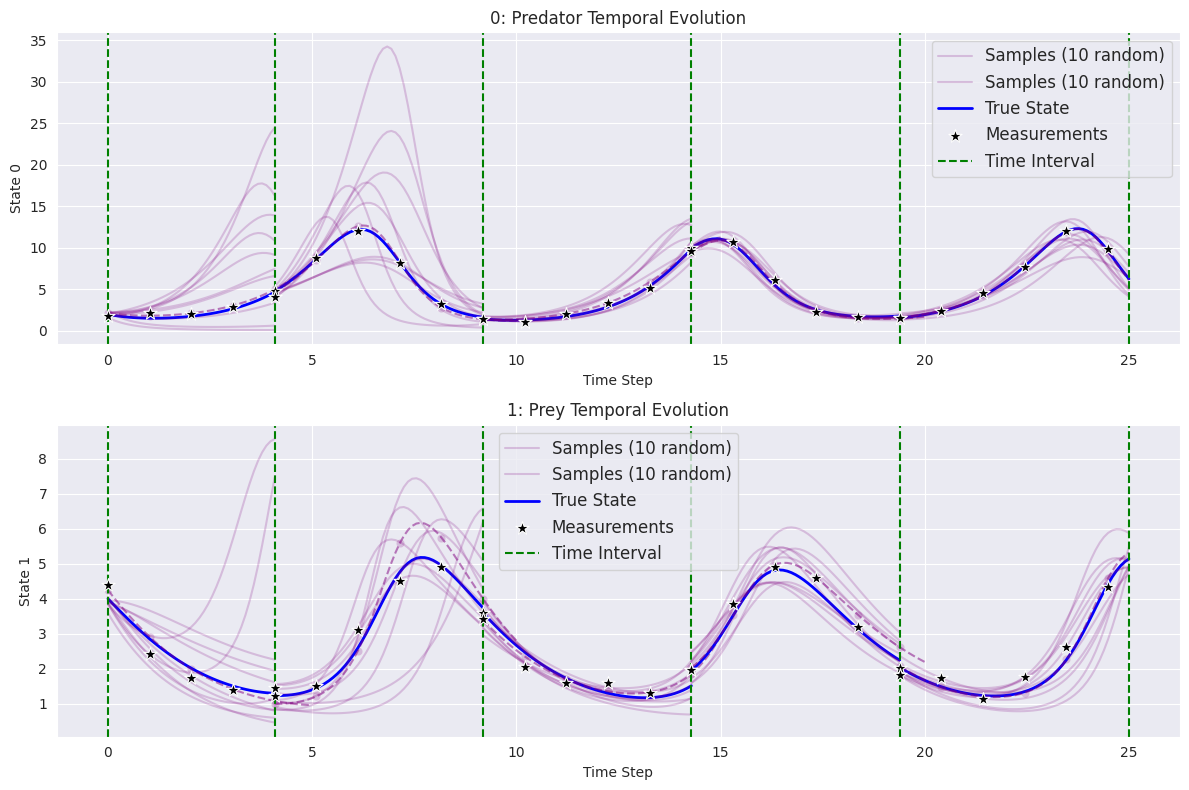

In [14]:
lvm.plot_states()

In [3]:
lvm.probs[0].pca

{'X_train': array([[-0.87074705,  1.95245365,  1.31461342, -0.83443134],
        [-0.01505164,  2.21966733,  0.78516095,  0.8700559 ],
        [-0.63576789, -1.66529854,  0.25971317, -0.4842527 ],
        ...,
        [-0.82232276, -1.76243303,  1.10057982, -1.37677972],
        [-2.42630312,  1.45727133, -1.10518463, -0.93767307],
        [ 0.28160483,  2.12167765,  0.66695963,  0.36660628]]),
 'vecs': array([[-0.02582248,  0.04401217, -0.43419475, -0.11766534, -0.43266582,
         -0.27587249, -0.37871494, -0.38453076, -0.2280625 , -0.43407275],
        [ 0.03316756,  0.16160207, -0.09844752,  0.56058443, -0.17661808,
          0.48248694, -0.31355514,  0.28875357, -0.44337917,  0.08105394],
        [ 0.05478031, -0.91306484,  0.03203766, -0.18068025, -0.02074878,
          0.06036499, -0.1444463 ,  0.1426293 , -0.28554662,  0.05311099],
        [-0.98237303, -0.02384398, -0.11279078, -0.0486579 ,  0.00206004,
          0.01672897,  0.01105376,  0.08645651, -0.03429422,  0.10113476]

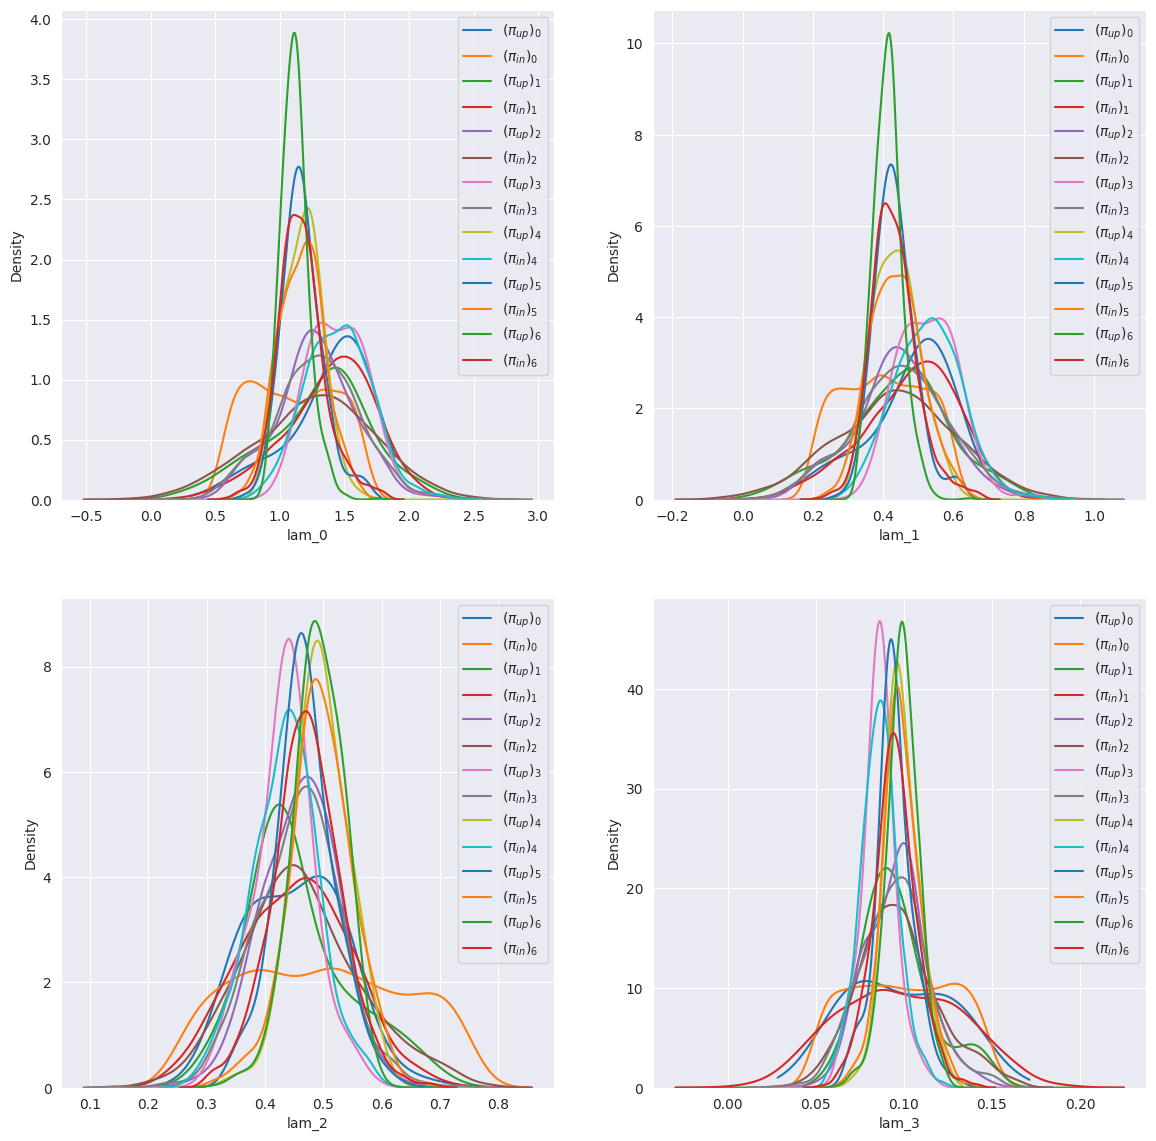

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14,14))

for p_idx, ax in enumerate(axes.flat):
    for i in range(len(lvm.probs)):
        sns.kdeplot(data=lvm.probs[i].state, x=f'lam_{p_idx}', weights='ratio', label=f'$(\pi_{{up}})_{{{i}}}$', ax=ax)
        sns.kdeplot(data=lvm.probs[i].state, x=f'lam_{p_idx}', label=f'$(\pi_{{in}})_{{{i}}}$', ax=ax)
    ax.legend()

In [91]:
lvm.probs[0].split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  \
split nc qoi_comb                                                        
0     1  0         1.023801  1.876024   0.621348   0.225433   0.707295   
      2  0         1.064722  3.423114   1.146592   0.461590   0.587988   
      3  0         1.156865  3.436514   1.277645   0.502681   0.444009   
      4  0         1.362618  3.545708   1.277645   0.502681   0.444009   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl  \
split nc qoi_comb                                                             
0     1  0          0.139892       0.023801           True     True   False   
      2  0          0.117829       0.064722           True    False   False   
      3  0          0.064918       0.156865           True    False   False   
      4  0          0.064918       0.362618           True    False    True   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False

In [11]:
lvm.probs[3].param_density_plots()

IndexError: list index out of range

## Using $Q_{PCA}$ Map

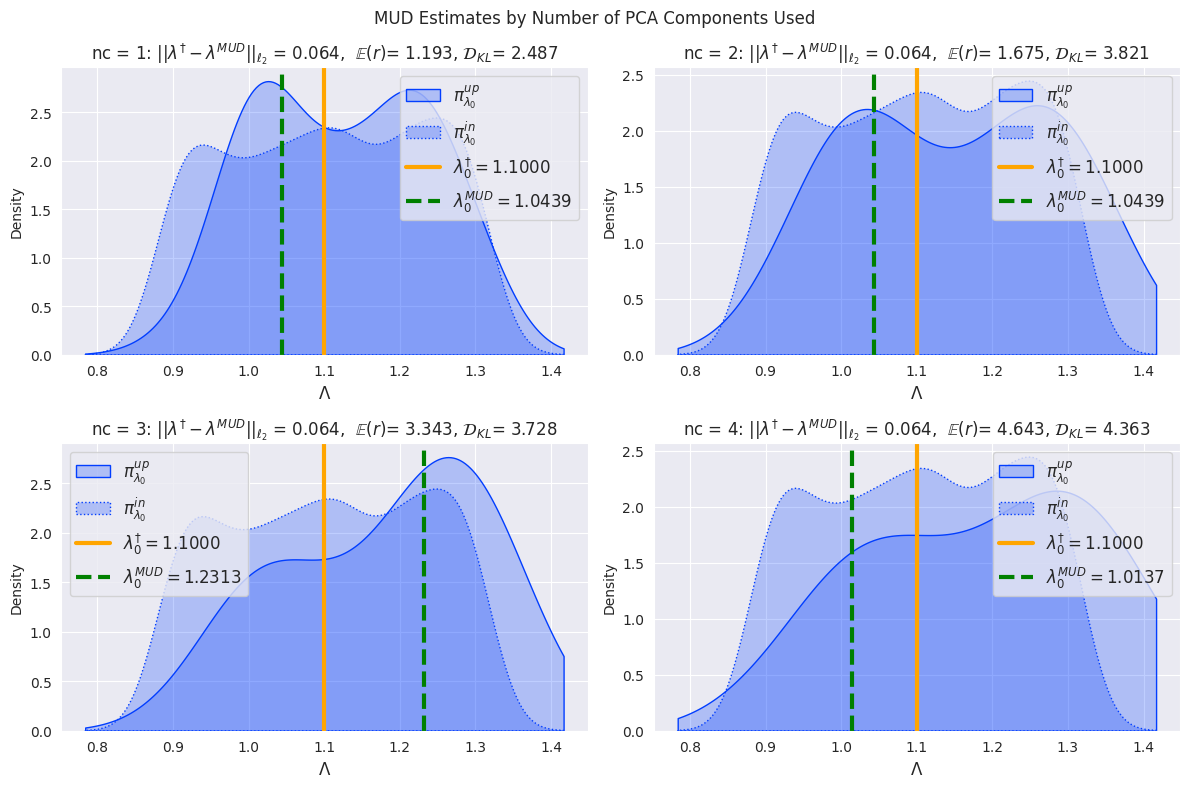

In [194]:
import matplotlib.pyplot as plt
import pydci.ConsistentBayes as CB
importlib.reload(CB)

pca_prob = CB.PCAMUDProblem(res['samples'], res['data'], res['std_dev'])
pca_prob.solve(best_method='max_kl', exp_thresh=0.3)
pca_prob.pca_states.loc[0]
pca_prob.nc_param_density_plots(param_idx=0, lam_true=lvm.lam_true)

In [125]:
pca_prob.pca_result

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  \
nc                                                                   
1   0.986944  2.662155   1.115412   0.422366   0.526791   0.095363   
2   1.036150  4.414704   1.190568   0.464913   0.479235   0.096212   
3   2.301997  4.572075   1.190568   0.464913   0.479235   0.096212   
4   2.718816  5.433852   1.190568   0.464913   0.479235   0.096212   

    predict_delta  within_thresh  closest  max_kl  min_kl  
nc                                                         
1        0.013056           True     True   False    True  
2        0.036150           True    False    True   False  
3        1.301997          False    False   False   False  
4        1.718816          False    False   False   False

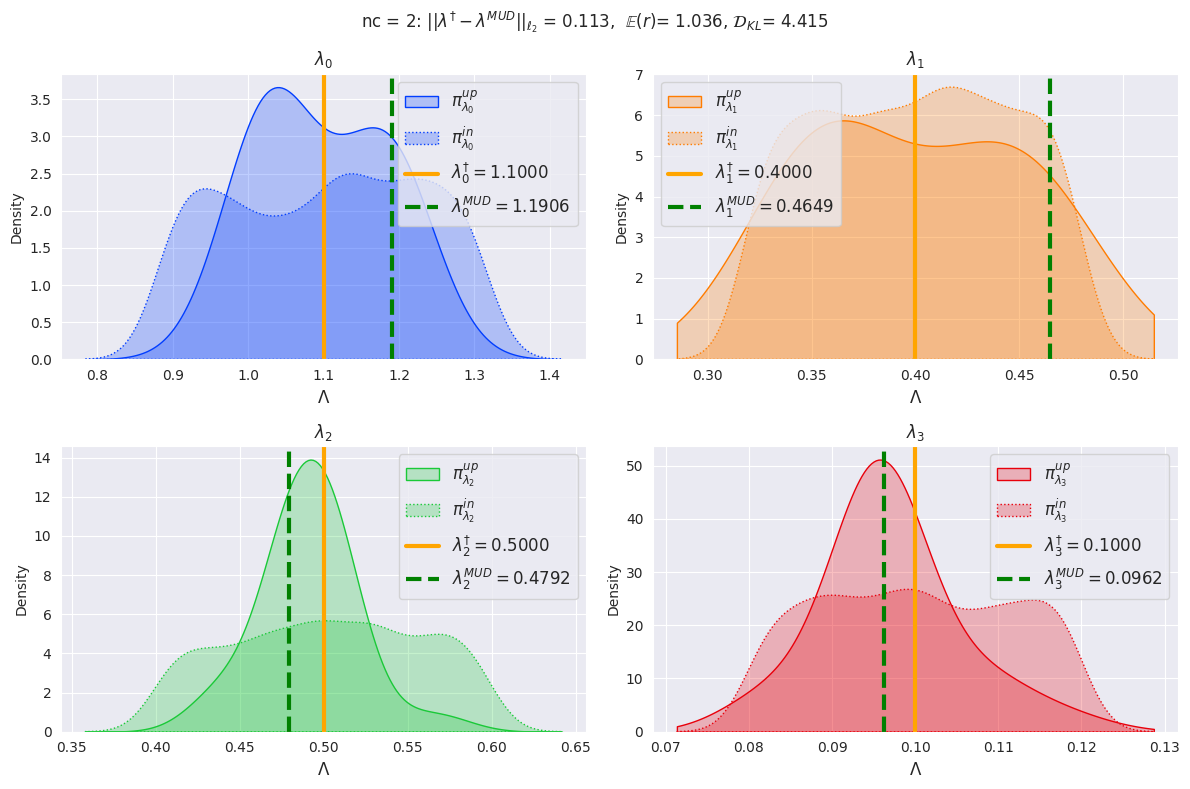

In [128]:
pca_prob.param_density_plots(nc=2, lam_true=lvm.lam_true)

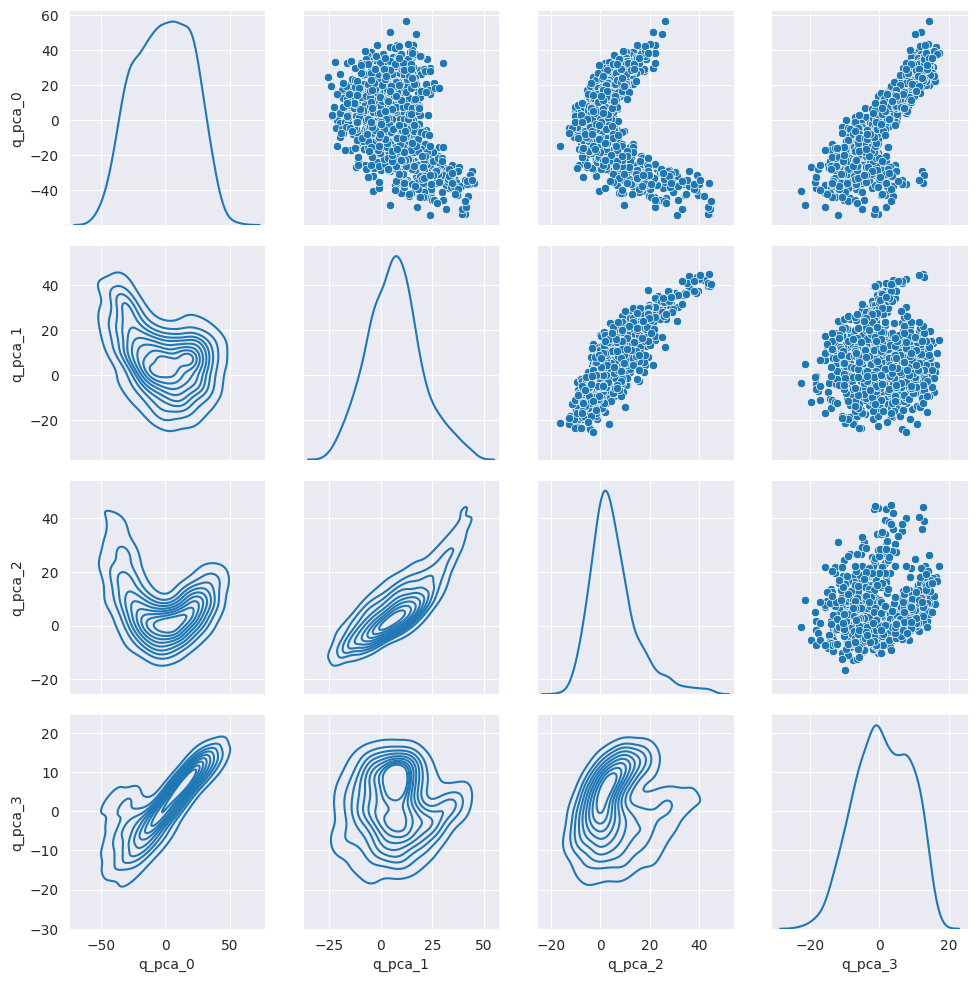

In [129]:
pca_prob.learned_qoi_plot()

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

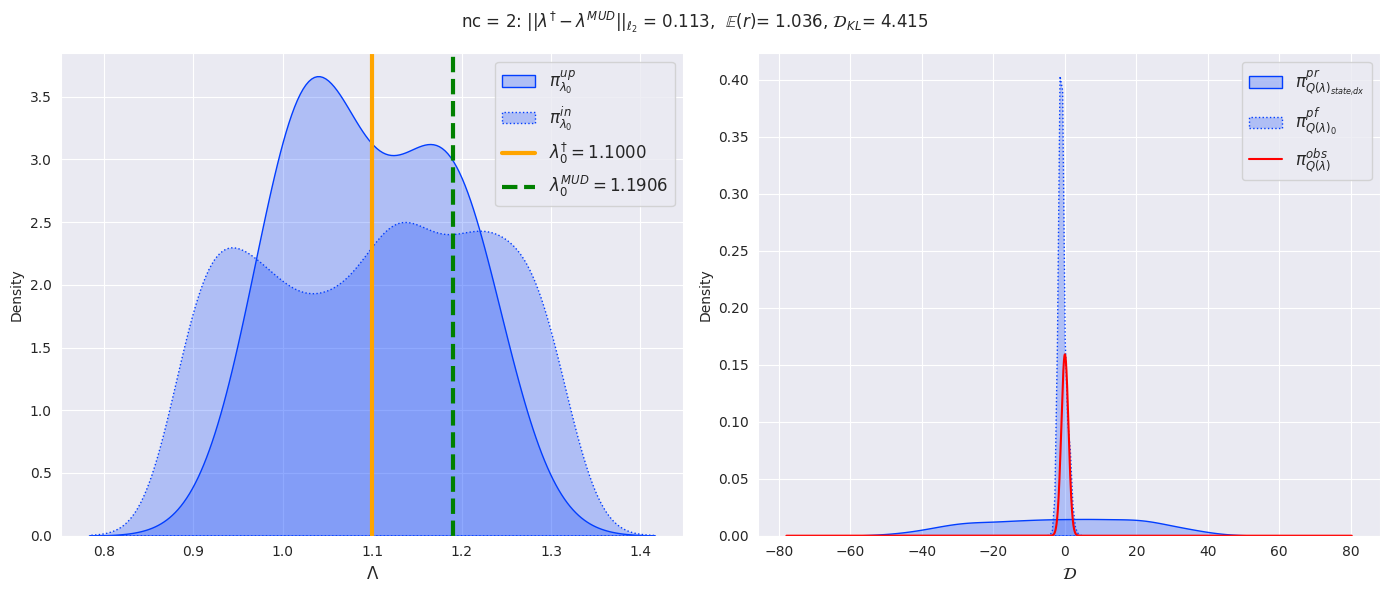

In [133]:
pca_prob.density_plots(lam_kwargs={'lam_true': [lvm.lam_true]})

### Solution Trajectory
Getting best sample and plotting state in LVM Model:

In [134]:
bf = np.empty((len(lvm.samples[0]), 1), dtype=bool)
bf[:] = False
bf[pca_prob.mud_arg] = True
lvm.samples[0]['best_flag'] = bf

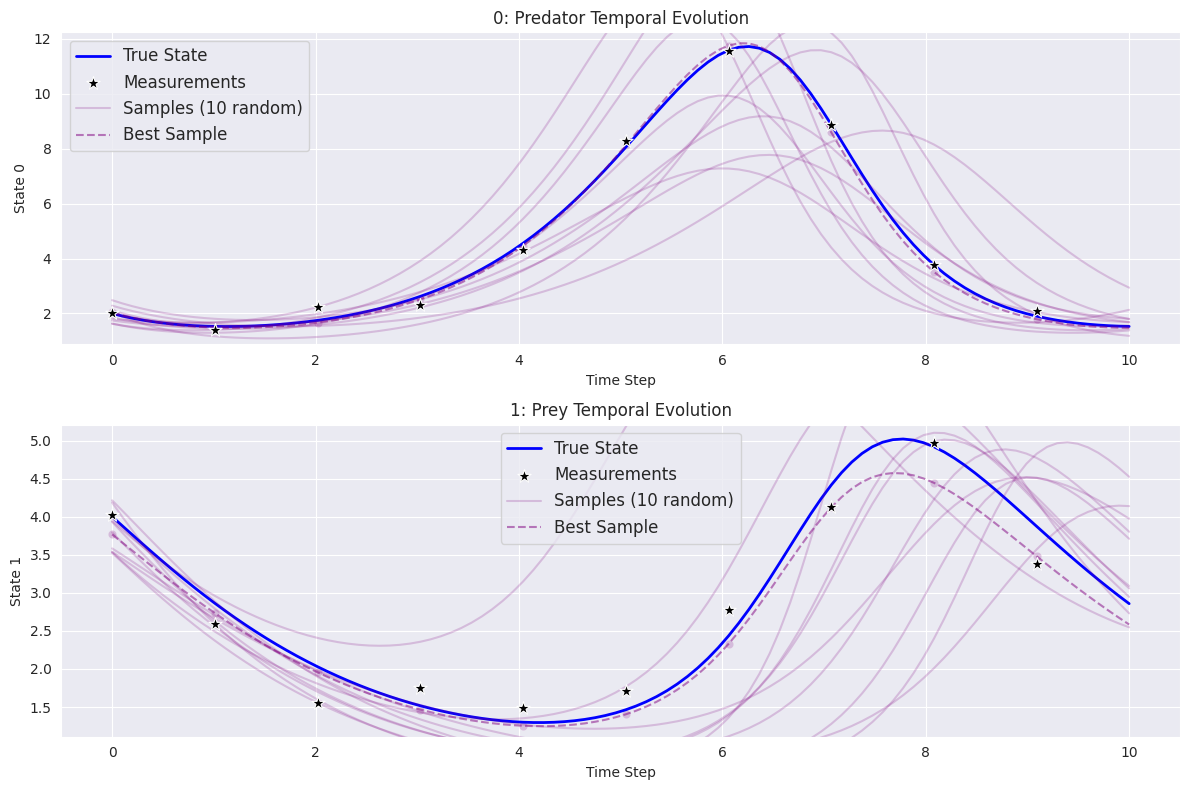

In [135]:
lvm.plot_states()

### PCA Solve Options - Masking Data

We can control the amount of data we use with the mask option

In [68]:
mask = np.arange(0, 10, 1)
mask

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

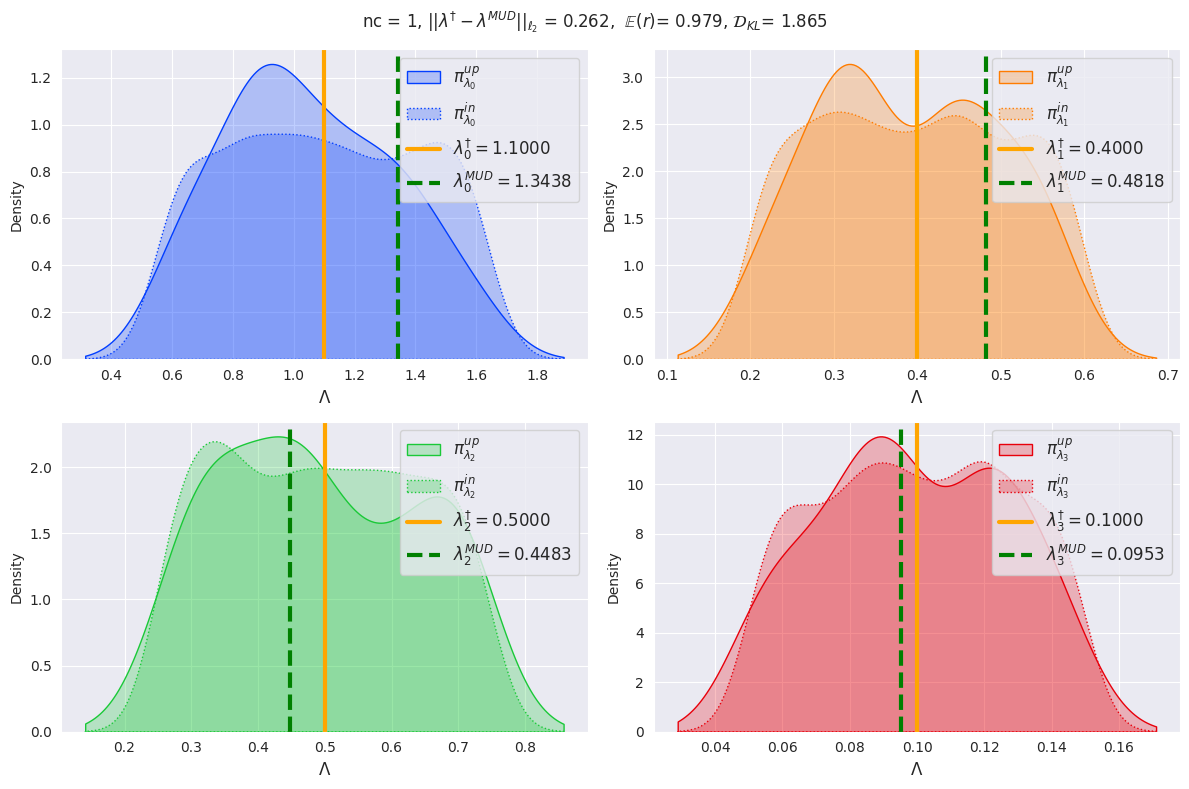

In [69]:
pca_prob.solve(pca_mask=mask)
pca_prob.param_density_plots(lam_true=lvm.lam_true)

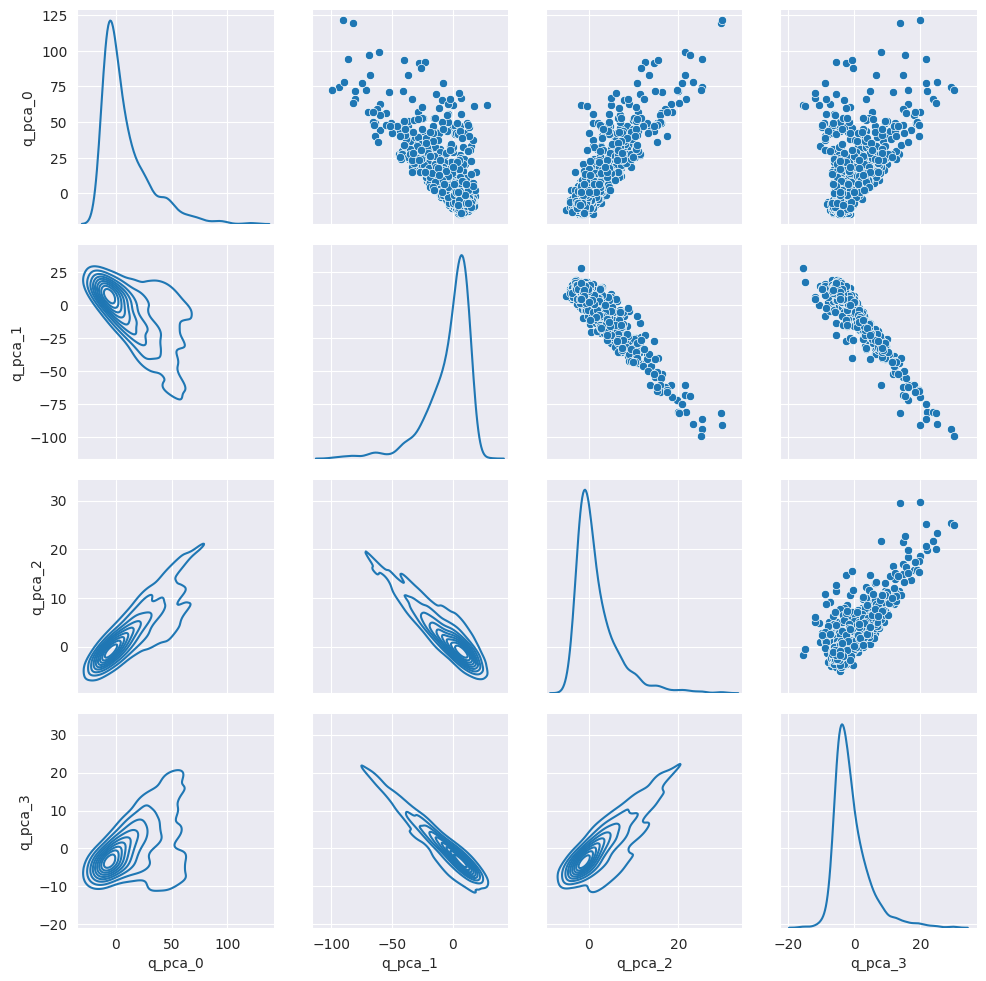

In [70]:
pca_prob.learned_qoi_plot()

## Sequential Estimation

Break up into intervals and solve

Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.6s (1569.


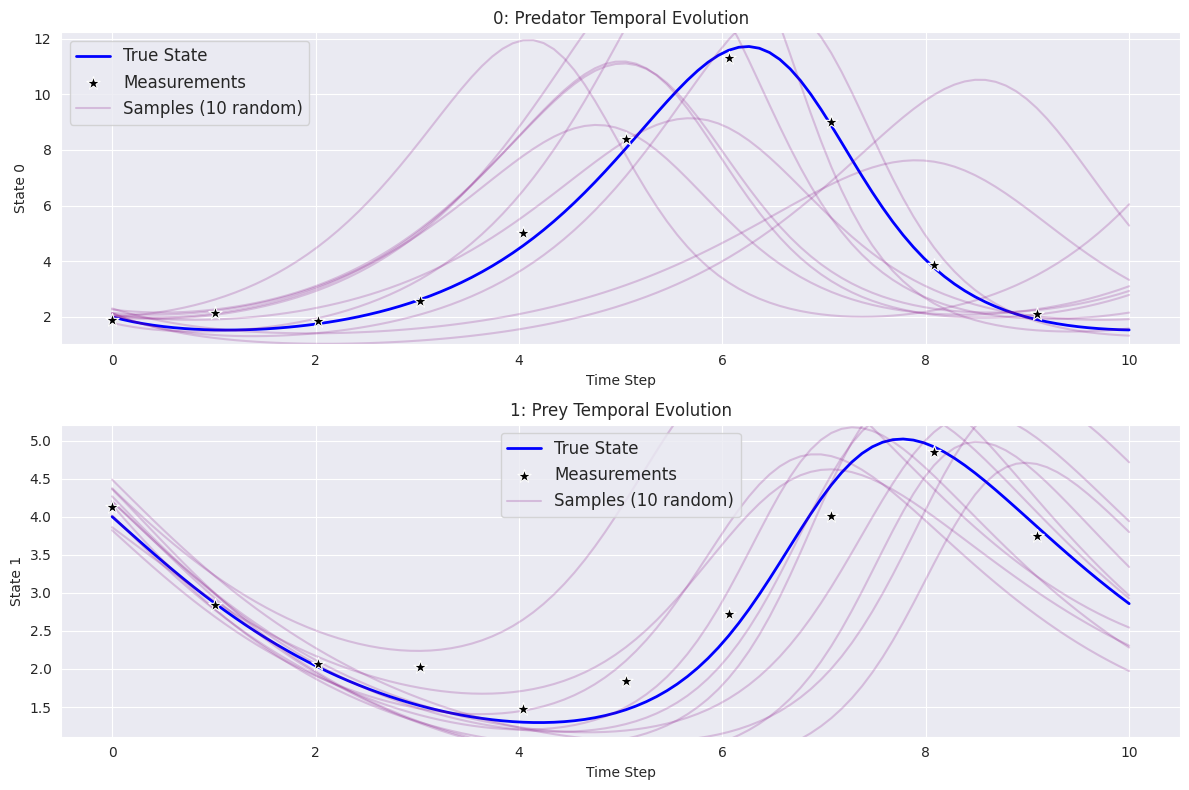

In [147]:
import numpy as np
from pydci.examples import lotka_volterra
import importlib
importlib.reload(lotka_volterra)

lvm = lotka_volterra.LotkaVolteraModel()
samples = lvm.get_uniform_initial_samples(num_samples=1000, scale=0.2)
res = lvm.forward_solve(10, samples=samples)
lvm.plot_states()

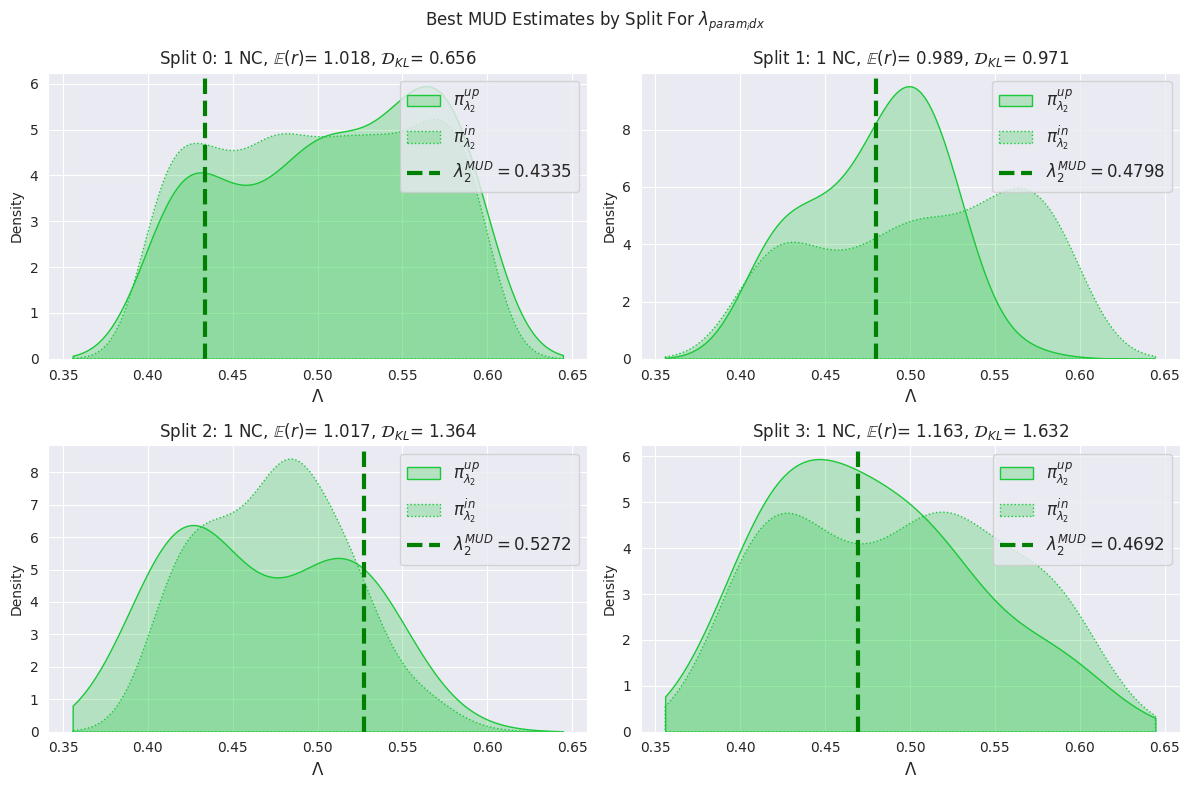

In [201]:
import matplotlib.pyplot as plt
import pydci.ConsistentBayes as CB
importlib.reload(CB)

seq_prob = CB.SequentialProblem(res['samples'], res['data'], res['std_dev'])
seq_prob.solve(num_splits=4, qoi_method='all', best_method='max_kl', exp_thresh=0.2)
# seq_prob.param_density_plots(lam_true=lvm.lam_true)
seq_prob.splits_param_density_plots(param_idx=2)

In [188]:
seq_prob.split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  \
split nc qoi_comb                                                        
0     1  0         1.018188  0.656183   1.216901   0.413309   0.497706   
      2  0         1.030611  0.788861   1.125259   0.415015   0.530403   
      3  0         0.974521  1.005180   1.297913   0.350505   0.433518   
      4  0         0.690221  1.023622   1.145280   0.354992   0.544607   
1     1  0         0.989236  0.971123   0.970538   0.333703   0.565990   
      2  0         1.075366  1.809889   1.053428   0.333806   0.479808   
      3  0         0.523835  1.987788   1.053428   0.333806   0.479808   
      4  0         0.177254  2.109884   1.053428   0.333806   0.479808   
2     1  0         1.017095  1.364089   1.013740   0.358699   0.527216   
      2  0         2.095657  2.481498   1.241161   0.418560   0.415081   
      3  0         1.419873  3.576306   1.241161   0.418560   0.415081   
      4  0         0.321571  3.212154   1.241161   0.418560   0.415081   
3     1  0         1.163189  1.631957   1.135231   0.405484   0.469207   
      2  0         1.333195  1.561347   1.135231   0.405484   0.469207   
      3  0         1.124915  1.532575   1.135231   0.405484   0.469207   
      4  0         0.341714  2.760314   1.135231   0.405484   0.469207   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl  \
split nc qoi_comb                                                             
0     1  0          0.105329       0.018188           True     True   False   
      2  0          0.104346       0.030611           True    False   False   
      3  0          0.095280       0.025479           True    False    True   
      4  0          0.105387       0.309779          False    False   False   
1     1  0          0.084661       0.010764           True     True   False   
      2  0          0.100381       0.075366           True    False    True   
      3  0          0.100381       0.476165          False    False   False   
      4  0          0.100381       0.822746          False    False   False   
2     1  0          0.107268       0.017095           True     True    True   
      2  0          0.084422       1.095657          False    False   False   
      3  0          0.084422       0.419873          False    False   False   
      4  0          0.084422       0.678429          False    False   False   
3     1  0          0.109125       0.163189           True    False    True   
      2  0          0.109125       0.333195          False    False   False   
      3  0          0.109125       0.124915           True     True   False   
      4  0          0.109125       0.658286          False    False   False   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False  
1     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False  
2     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False  
3     1  0          False  
      2  0          False  
      3  0           True  
      4  0          False

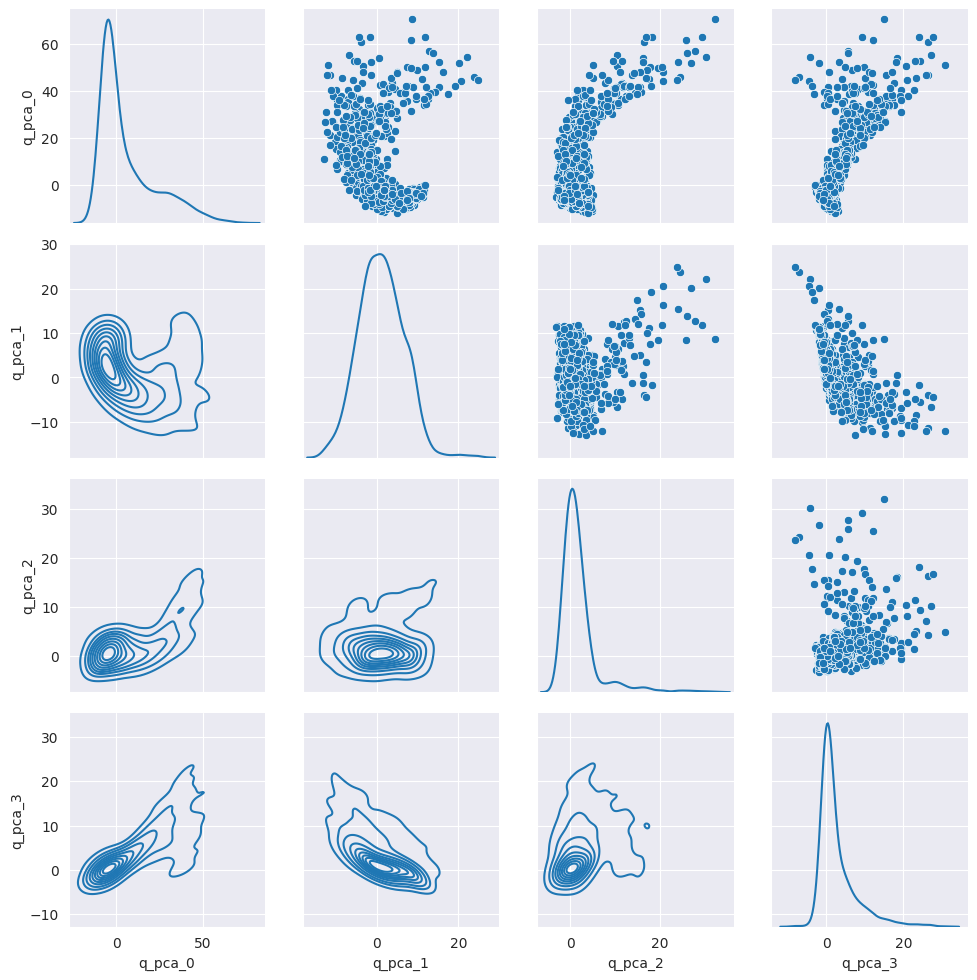

In [204]:
seq_prob.learned_qoi_plot()

In [193]:
seq_prob.result

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  \
split nc qoi_comb                                                        
3     1  0         1.259602  2.553501   0.985873   0.365181    0.54691   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl  \
split nc qoi_comb                                                             
3     1  0          0.110931       0.259602           True     True    True   

                   min_kl  
split nc qoi_comb          
3     1  0           True

In [194]:
seq_prob.split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  \
split nc qoi_comb                                                        
0     1  0         0.963130  2.044906   0.853752   0.305926   0.579848   
      2  0         1.111728  3.844720   0.763867   0.269555   0.593512   
      3  0         1.158137  3.910305   0.763867   0.269555   0.593512   
      4  0         1.057947  3.979462   1.332168   0.479439   0.416690   
1     1  0         1.797614  2.171496   0.985873   0.365181   0.546910   
      2  0         0.752445  3.895602   0.985873   0.365181   0.546910   
      3  0         0.364793  2.962074   0.985873   0.365181   0.546910   
      4  0         3.780484  2.862205   0.985873   0.365181   0.546910   
2     1  0         4.367034  1.083191   0.985873   0.365181   0.546910   
      2  0              NaN  1.415896   0.985873   0.365181   0.546910   
      3  0              NaN       inf   0.985873   0.365181   0.546910   
      4  0              NaN       inf   1.037692   0.356834   0.480686   
3     1  0         1.259602  2.553501   0.985873   0.365181   0.546910   
      2  0         0.220513  5.115428   0.985873   0.365181   0.546910   
      3  0         1.861729  5.264801   0.985873   0.365181   0.546910   
      4  0         3.955115  4.694929   0.985873   0.365181   0.546910   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl  \
split nc qoi_comb                                                             
0     1  0          0.090298       0.036870           True     True   False   
      2  0          0.091082       0.111728           True    False   False   
      3  0          0.091082       0.158137           True    False   False   
      4  0          0.084554       0.057947           True    False    True   
1     1  0          0.110931       0.797614          False    False   False   
      2  0          0.110931       0.247555           True     True    True   
      3  0          0.110931       0.635207          False    False   False   
      4  0          0.110931       2.780484          False    False   False   
2     1  0          0.110931       3.367034          False    False   False   
      2  0          0.110931            NaN          False    False   False   
      3  0          0.110931            NaN          False    False   False   
      4  0          0.089990            NaN          False    False   False   
3     1  0          0.110931       0.259602           True     True    True   
      2  0          0.110931       0.779487          False    False   False   
      3  0          0.110931       0.861729          False    False   False   
      4  0          0.110931       2.955115          False    False   False   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False  
1     1  0          False  
      2  0           True  
      3  0          False  
      4  0          False  
2     1  0          False  
      2  0          False  
      3  0          False  
      4  0          False  
3     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False

In [195]:
seq_prob.state

weight      pi_in     pi_pr         pi_obs          ratio  \
0     1.040087e-13  16.880357  0.000093   0.000000e+00   0.000000e+00   
1     0.000000e+00   0.824245  0.005902  1.200183e-279  2.033636e-277   
2    5.203746e-107  18.129003  0.005770  1.929732e-286  3.344611e-284   
3    8.983998e-105   0.617082  0.006524  6.882607e-249  1.054948e-246   
4    2.991726e-153   0.004072  0.012468   5.585541e-93   4.480074e-91   
..             ...        ...       ...            ...            ...   
995   9.217853e-87   8.230683  0.001991   0.000000e+00   0.000000e+00   
996   6.159980e-18  14.086856  0.013201   3.889756e-83   2.946497e-81   
997   0.000000e+00   0.000013  0.016012   1.253468e-50   7.828224e-49   
998   2.564927e-64   0.074748  0.007811  8.069467e-195  1.033031e-192   
999   0.000000e+00   0.293274  0.006655  9.385613e-243  1.410366e-240   

             pi_up    q_lam_0   q_lam_1    q_lam_2   q_lam_3  ...    q_lam_8  \
0     0.000000e+00  20.510471  0.283376  40.334170  0.748382  ...   1.746509   
1     0.000000e+00   2.013037  1.981626   3.812483  1.380462  ...   6.593159   
2     0.000000e+00   2.494576  4.096999   1.996134  3.298584  ...   5.511623   
3     0.000000e+00   3.550546  2.318977   4.947789  2.218603  ...   8.850917   
4    5.457566e-246   2.303304  5.512159   1.693342  5.180962  ...   1.869252   
..             ...        ...       ...        ...       ...  ...        ...   
995   0.000000e+00   1.833568  4.415564   1.303841  2.710052  ...  10.076630   
996   2.556816e-97   4.573402  2.435932   4.827282  3.133166  ...   1.594794   
997   0.000000e+00   1.408111  8.309456   0.991645  7.002507  ...   1.640812   
998  1.980569e-257   2.708260  2.489058   3.228405  2.556982  ...   3.413954   
999   0.000000e+00   1.979777  5.454837   2.396457  3.904430  ...   9.089050   

      q_lam_9     lam_0     lam_1     lam_2     lam_3    q_pca_0     q_pca_1  \
0    2.934537  0.889557  0.497476  0.745509  0.057341  66.601476  118.059735   
1    6.180875  1.313080  0.415619  0.730161  0.134199 -35.813959   36.236058   
2    2.353821  1.569696  0.484142  0.456829  0.111415 -36.248118   -7.792346   
3    3.667110  1.038450  0.314534  0.308083  0.062878 -33.778566   24.285468   
4    3.799305  1.634340  0.361130  0.265342  0.103773 -20.567027  -20.204898   
..        ...       ...       ...       ...       ...        ...         ...   
995  1.027938  1.452983  0.511324  0.596187  0.076453 -49.286606   -5.336710   
996  3.381221  1.371254  0.476937  0.350175  0.124257 -19.433851   -3.223818   
997  4.092352  1.324589  0.218087  0.328734  0.136651 -15.098636  -29.924129   
998  3.637343  0.906378  0.291743  0.384226  0.138592 -29.866271    0.320837   
999  4.616741  1.149906  0.207922  0.601161  0.126407 -33.357760    4.093224   

       q_pca_2    q_pca_3  
0    58.070744  26.169889  
1   -45.668174  -9.797473  
2   -31.349620 -10.085052  
3   -35.574258   0.551678  
4   -33.042852 -20.913403  
..         ...        ...  
995 -37.070720   1.810423  
996 -16.953943 -18.783928  
997 -42.609431 -20.483625  
998 -26.149563 -18.538650  
999 -47.916794  -1.907008  

[1000 rows x 24 columns]

In [197]:
seq_prob.split_states

pi_obs_nc=1_qoi=0_split=0  pi_pr_nc=1_qoi=0_split=0  \
0                 2.022642e-04                  0.030633   
1                 3.376146e-52                  0.010635   
2                 1.184825e-14                  0.015328   
3                 1.435334e-09                  0.017093   
4                 3.311993e-86                  0.009157   
..                         ...                       ...   
995               2.432532e-06                  0.018701   
996               2.270757e-01                  0.027117   
997              1.124917e-275                  0.004764   
998               2.951092e-03                  0.021050   
999              1.229623e-258                  0.004975   

     ratio_nc=1_qoi=0_split=0  pi_up_nc=1_qoi=0_split=0  \
0                6.602746e-03              1.299094e-01   
1                3.174549e-50              1.051378e-48   
2                7.729932e-13              3.092667e-11   
3                8.397408e-08              3.319840e-06   
4                3.616735e-84              7.520481e-83   
..                        ...                       ...   
995              1.300735e-04              5.939311e-03   
996              8.373985e+00              3.774564e+02   
997             2.361175e-273             4.365205e-272   
998              1.401948e-01              6.970573e+00   
999             2.471373e-256             6.746837e-255   

     pi_obs_nc=2_qoi=0_split=0  pi_pr_nc=2_qoi=0_split=0  \
0                 1.934822e-14                  0.000449   
1                1.622523e-141                  0.000290   
2                 4.724824e-15                  0.000601   
3                 3.105758e-15                  0.000615   
4                2.397618e-102                  0.000097   
..                         ...                       ...   
995               9.388158e-35                  0.000496   
996               4.803797e-17                  0.001142   
997               0.000000e+00                  0.000027   
998               1.655047e-19                  0.000700   
999              4.901789e-278                  0.000095   

     ratio_nc=2_qoi=0_split=0  pi_up_nc=2_qoi=0_split=0  \
0                4.308918e-11              8.477824e-10   
1               5.592494e-138             1.852176e-136   
2                7.855151e-12              3.142766e-10   
3                5.048865e-12              1.996023e-10   
4                2.470458e-98              5.136963e-97   
..                        ...                       ...   
995              1.892197e-31              8.639998e-30   
996              4.207152e-14              1.896369e-12   
997              0.000000e+00              0.000000e+00   
998              2.365261e-16              1.176023e-14   
999             5.179731e-274             1.414064e-272   

     pi_obs_nc=3_qoi=0_split=0  pi_pr_nc=3_qoi=0_split=0  ...  \
0                 5.522433e-15                  0.000030  ...   
1                3.461129e-157                  0.000067  ...   
2                 1.827853e-15                  0.000160  ...   
3                 1.099586e-16                  0.000088  ...   
4                4.395253e-103                  0.000026  ...   
..                         ...                       ...  ...   
995               7.384114e-45                  0.000027  ...   
996               2.956089e-19                  0.000240  ...   
997               0.000000e+00                  0.000010  ...   
998               7.521188e-23                  0.000067  ...   
999              2.600188e-288                  0.000020  ...   

     ratio_nc=2_qoi=0_split=3  pi_up_nc=2_qoi=0_split=3  \
0                0.000000e+00              0.000000e+00   
1                0.000000e+00              0.000000e+00   
2               7.396814e-296              0.000000e+00   
3                0.000000e+00              0.000000e+00   
4               2.321014e-178              0.000000e+00   
..        

# Results

In [69]:
lvm.get_full_df('state')

ts  iteration  shift_idx  sample_flag  true_param_0  true_param_1  \
0    0.000000          0          0         True           1.1           0.4   
1    0.102041          0          0        False           1.1           0.4   
2    0.204082          0          0        False           1.1           0.4   
3    0.306122          0          0        False           1.1           0.4   
4    0.408163          0          0        False           1.1           0.4   
..        ...        ...        ...          ...           ...           ...   
45  24.591837          4          0        False           1.1           0.4   
46  24.693878          4          0        False           1.1           0.4   
47  24.795918          4          0        False           1.1           0.4   
48  24.897959          4          0        False           1.1           0.4   
49  25.000000          4          0        False           1.1           0.4   

    true_param_2  true_param_3  true_vals_0  true_vals_1  ...  random_408_0  \
0            0.5           0.1     2.000000     4.000000  ...      2.000000   
1            0.5           0.1     1.905276     3.877485  ...      1.793152   
2            0.5           0.1     1.824128     3.755355  ...      1.625088   
3            0.5           0.1     1.755130     3.634292  ...      1.488432   
4            0.5           0.1     1.697053     3.514855  ...      1.377383   
..           ...           ...          ...          ...  ...           ...   
45           0.5           0.1    11.071261     3.518400  ...     11.619041   
46           0.5           0.1    10.681807     3.736096  ...     11.587708   
47           0.5           0.1    10.215512     3.949937  ...     11.479346   
48           0.5           0.1     9.686276     4.154807  ...     11.292721   
49           0.5           0.1     9.110432     4.345667  ...     11.029339   

    random_408_1  random_172_0  random_172_1  random_380_0  random_380_1  \
0       4.000000      2.000000      4.000000      2.000000      4.000000   
1       3.805148      1.890969      3.954305      1.896838      3.988298   
2       3.612626      1.790945      3.903789      1.800426      3.970828   
3       3.424328      1.699389      3.849089      1.710786      3.948059   
4       3.241598      1.615757      3.790808      1.627837      3.920468   
..           ...           ...           ...           ...           ...   
45      2.726896     10.201254      2.588388     11.500240      2.880131   
46      2.899179     10.271456      2.748455     11.371797      3.073735   
47      3.080367     10.289616      2.919793     11.158769      3.274706   
48      3.268427     10.252038      3.101502     10.863504      3.479871   
49      3.460769     10.156296      3.292208     10.491810      3.685446   

    random_798_0  random_798_1  random_976_0  random_976_1  
0       2.000000      4.000000      2.000000      4.000000  
1       2.042169      3.829794      1.735840      3.773733  
2       2.094469      3.668773      1.527070      3.553210  
3       2.157102      3.516786      1.361131      3.340319  
4       2.230378      3.373663      1.228615      3.136253  
..           ...           ...           ...           ...  
45     11.509270      2.868538     11.458861      3.592145  
46     11.468441      3.082433     11.031751      3.832276  
47     11.346318      3.309325     10.520320      4.068135  
48     11.141256      3.546545      9.940807      4.293563  
49     10.854772      3.790521      9.312268      4.502503  

[250 rows x 36 columns]

In [70]:
lvm.get_full_df('results')

iteration  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3    l2_err       e_r  \
0        0.0   1.309198   0.513625   0.480100   0.087085  0.239244  2.592165   
0        1.0   0.994708   0.359768   0.527251   0.105570  0.116097  1.339634   
0        2.0   1.041748   0.365001   0.493057   0.097794  0.068347  0.141104   
0        3.0   0.986603   0.356108   0.589472   0.112386  0.151473  0.552086   
0        4.0   1.087136   0.409810   0.569814   0.110364  0.072410  0.079377   

         kl  mean_e_r  e_r_std   min_e_r   max_e_r  predict_delta  \
0  3.168175  2.592165      NaN  2.592165  2.592165       1.592165   
0  4.649279  1.339634      NaN  1.339634  1.339634       0.339634   
0  1.533265  0.141104      NaN  0.141104  0.141104       0.858896   
0  0.382706  0.552086      NaN  0.552086  0.552086       0.447914   
0  8.529699  0.079377      NaN  0.079377  0.079377       0.920623   

   within_thresh  closest  max_kl  min_kl     action  
0           True     True    True    True     UPDATE  
0           True     True    True    True     UPDATE  
0           True     True    True    True  RE-WEIGHT  
0           True     True    True    True  RE-WEIGHT  
0           True     True    True    True     UPDATE

(-1.0, 10.0)

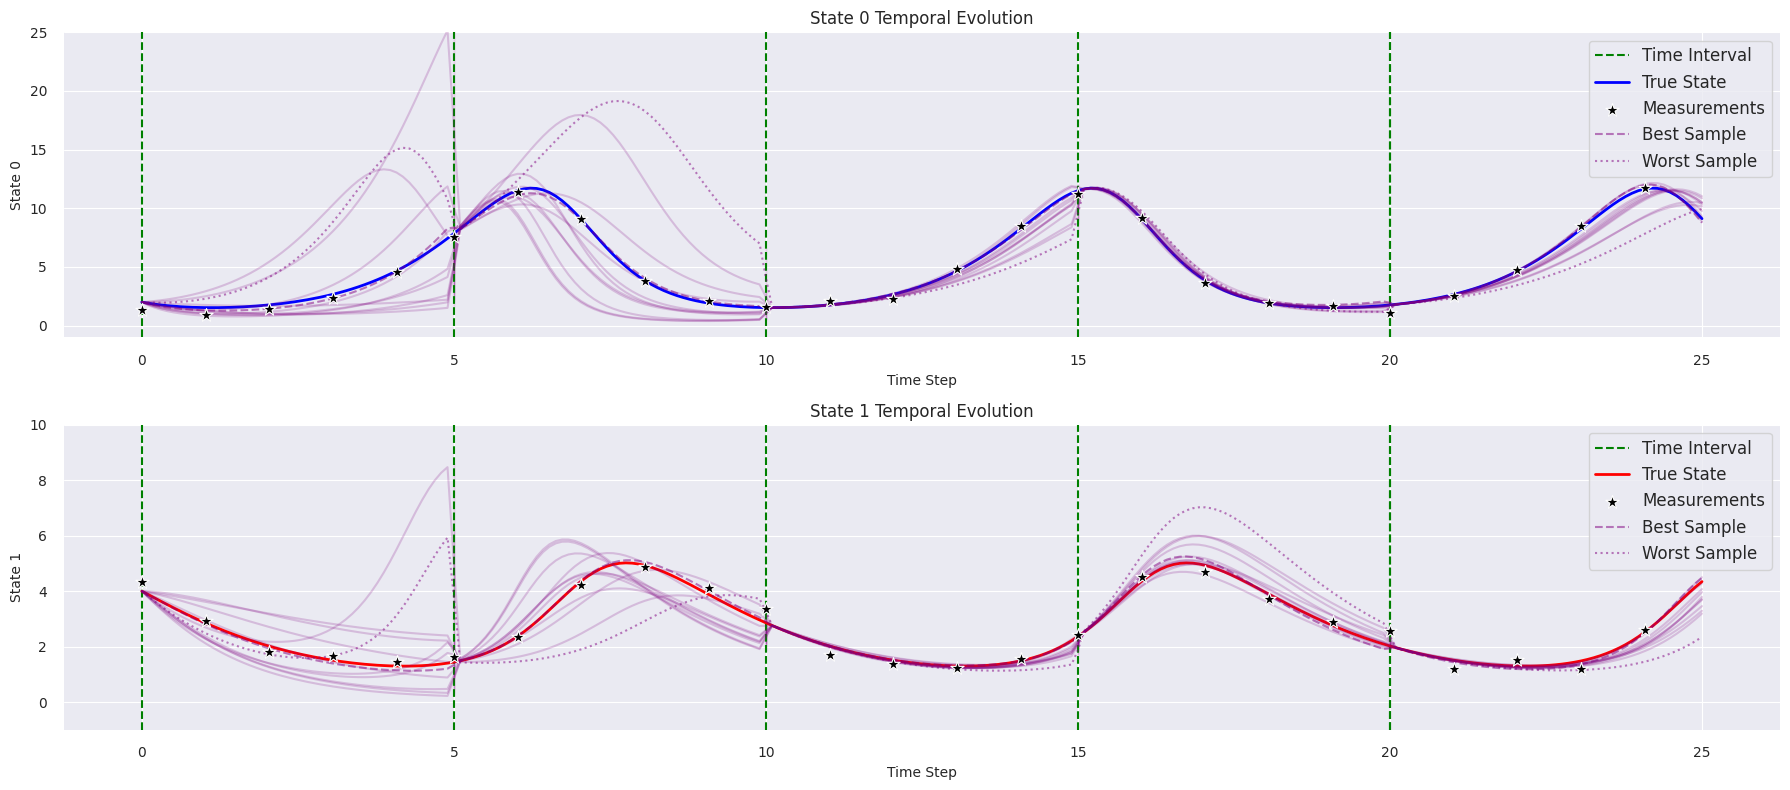

In [71]:
importlib.reload(plt)
plotter = plt.Plotter()

axs = plotter.plot_state_data(lvm, window_type='line')
axs[0].set_ylim([-1, 25])
axs[1].set_ylim([-1, 10])

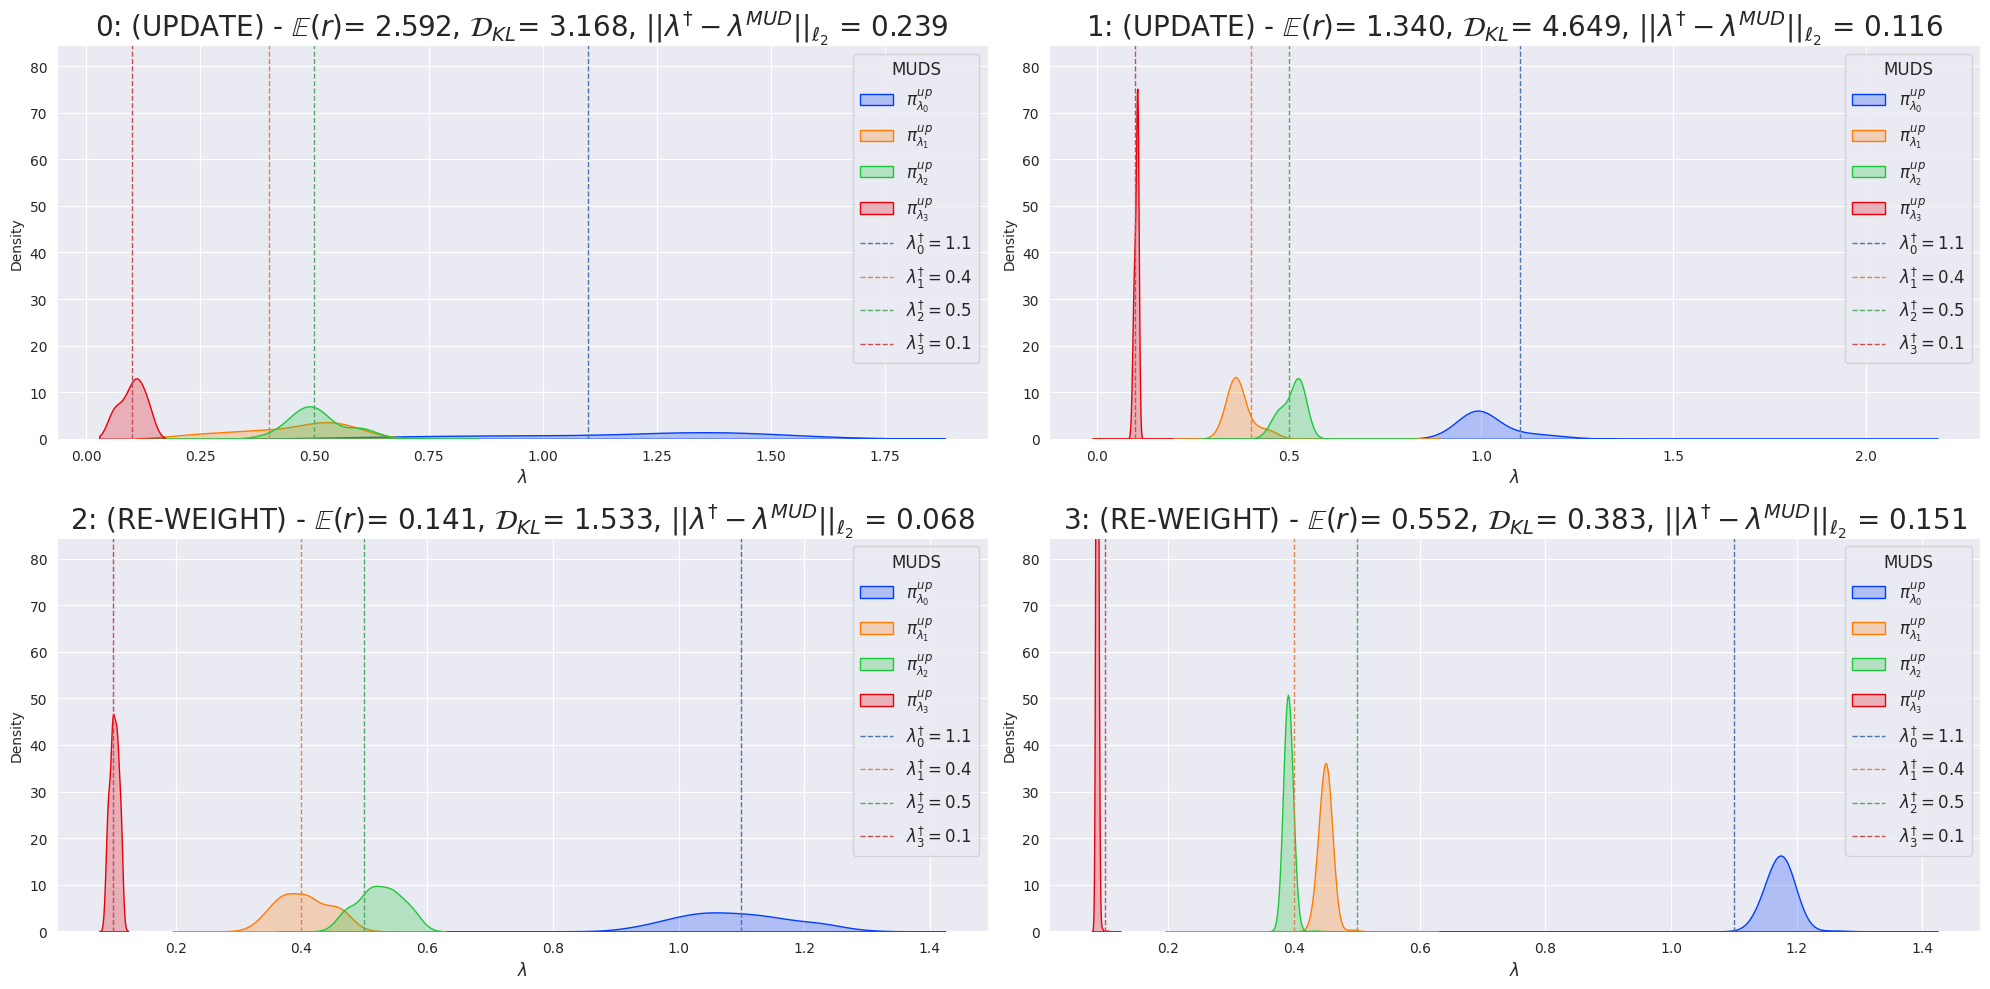

In [72]:
importlib.reload(plt)
plotter = plt.Plotter()

ax = plotter.plot_parameters(lvm, param_idxs=None, nrows=2,ncols=2, plot_initial=False, plot_legend=True)

(-0.1, 0.1)

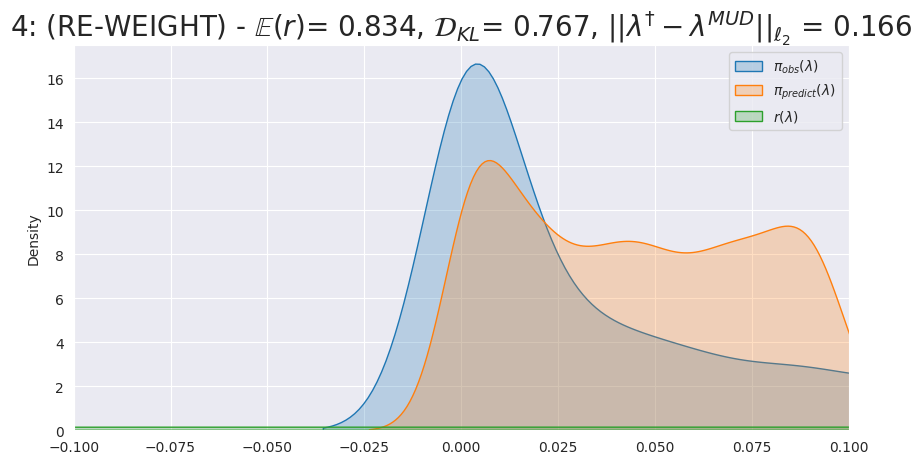

In [9]:
importlib.reload(plt)
plotter = plt.Plotter()

axs = plotter.plot_ratios(lvm, iterations=[4])
axs[0].set_xlim([-0.1,0.1])

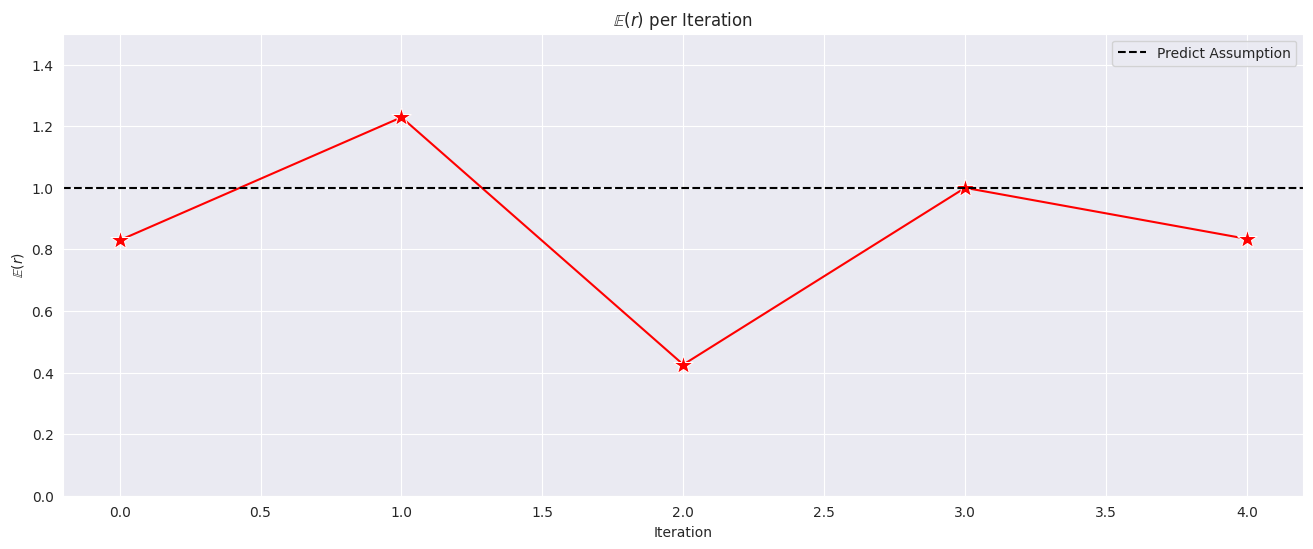

In [10]:
importlib.reload(plt)
plotter = plt.Plotter()

ax = plotter.plot_expected_ratios(lvm)

### Other plots

## Param Shift

In [37]:
num_samples = 1000
lv1_param_mins = [0, 0, 0, 0]
lv1_true_param = lv_p1
x0 = np.array([2, 4])
param_shifts = {50: lv_p2}

search_params = {
    "nc": 1,
    "method": "all",
    "best": "closest",
    "reweight": True,
    "resample": True,
    "min_weight_thresh": 1e-20,
}

SDP.disable_log()
SDP.enable_log('lvm_shift.log') # 'test.log'

lvm_shift = SDP.SequentialDensityProblem(
    run_lv,
    x0,
    lv1_true_param,
    measurement_noise=0.3,
    solve_ts=0.1,
    sample_ts=1,
    diff=0.15,
    hot_starts=True,
    param_mins=lv1_param_mins,
    param_shifts=param_shifts,
    search_params=search_params,
)


lvm_shift.seq_solve(
    list(np.arange(5, 100, 5)), num_samples=num_samples, init_seed=lv1_initial_seed
)

In [42]:
lvm_shift.get_full_df('results')

iteration  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3    l2_err  \
0        0.0   1.020073   0.415474   0.535008   0.092536  0.088933   
0        1.0   1.144041   0.426524   0.568299   0.103627  0.085563   
0        2.0   1.041359   0.448388   0.573360   0.107992  0.105951   
0        3.0   1.045578   0.381962   0.573023   0.103311  0.092900   
0        4.0   1.118205   0.423153   0.457905   0.089288  0.052481   
0        5.0   1.100234   0.402581   0.439593   0.087543  0.061733   
0        6.0   1.142777   0.412111   0.455019   0.093134  0.063616   
0        7.0   1.188606   0.454313   0.495869   0.098151  0.104026   
0        8.0   1.044713   0.377847   0.492449   0.093684  0.060368   
0        9.0   1.071921   0.385399   0.515438   0.104118  0.035453   
0       10.0   1.027936   0.370111   0.506687   0.099309  0.078305   
0       11.0   1.065573   0.399724   0.431890   0.093151  0.076624   
0       12.0   0.960809   0.349734   0.482159   0.097138  0.149088   
0       13.0   0.966319   0.344305   0.425708   0.090391  0.163046   
0       14.0   0.939159   0.352251   0.569352   0.110407  0.181846   
0       15.0   0.966319   0.344305   0.425708   0.090391  0.163046   
0       16.0   0.939159   0.352251   0.569352   0.110407  0.181846   
0       17.0   0.936096   0.350044   0.519253   0.101493  0.172433   
0       18.0   0.939159   0.352251   0.569352   0.110407  0.181846   

            e_r         kl      mean_e_r  e_r_std       min_e_r       max_e_r  \
0  1.025684e+00   0.879448  1.025684e+00      NaN  1.025684e+00  1.025684e+00   
0  1.060664e+00   1.004057  1.060664e+00      NaN  1.060664e+00  1.060664e+00   
0  7.361271e-01   0.690713  7.361271e-01      NaN  7.361271e-01  7.361271e-01   
0  9.217223e-01   1.258334  9.217223e-01      NaN  9.217223e-01  9.217223e-01   
0  8.982552e-01   1.338004  8.982552e-01      NaN  8.982552e-01  8.982552e-01   
0  9.888614e-01   1.089782  9.888614e-01      NaN  9.888614e-01  9.888614e-01   
0  9.438657e-01   0.471831  9.438657e-01      NaN  9.438657e-01  9.438657e-01   
0  1.025857e+00   0.212427  1.025857e+00      NaN  1.025857e+00  1.025857e+00   
0  9.817774e-01   0.686800  9.817774e-01      NaN  9.817774e-01  9.817774e-01   
0  9.950495e-01   0.229483  9.950495e-01      NaN  9.950495e-01  9.950495e-01   
0  9.565151e-01   1.883960  9.565151e-01      NaN  9.565151e-01  9.565151e-01   
0  2.117751e-08  10.852722  2.117751e-08      NaN  2.117751e-08  2.117751e-08   
0  9.128859e-01   7.043242  9.128859e-01      NaN  9.128859e-01  9.128859e-01   
0  3.153501e-07  11.630759  3.153501e-07      NaN  3.153501e-07  3.153501e-07   
0  2.635445e-17   9.128716  2.635445e-17      NaN  2.635445e-17  2.635445e-17   
0  6.020138e-07  11.526081  6.020138e-07      NaN  6.020138e-07  6.020138e-07   
0  4.736714e-15   9.372756  4.736714e-15      NaN  4.736714e-15  4.736714e-15   
0  1.134800e-06   7.304264  1.134800e-06      NaN  1.134800e-06  1.134800e-06   
0  2.794425e-22   9.989686  2.794425e-22      NaN  2.794425e-22  2.794425e-22   

   predict_delta  within_thresh  closest  max_kl  min_kl     action  
0       0.025684           True     True    True    True     UPDATE  
0       0.060664           True     True    True    True     UPDATE  
0       0.263873           True     True    True    True  RE-WEIGHT  
0       0.078278           True     True    True    True  RE-WEIGHT  
0       0.101745           True     True    True    True     UPDATE  
0       0.011139           True     True    True    True  RE-WEIGHT  
0       0.056134           True     True    True    True  RE-WEIGHT  
0       0.025857           True     True    True    True  RE-WEIGHT  
0       0.018223           True     True    True    True  RE-WEIGHT  
0       0.004951           True     True    True    True  RE-WEIGHT  
0       0.043485           True     True    True    True     UPDATE  
0       1.000000          False    False   False   False       NONE  
0       0.087114           True     True    True    True     UPDATE  
0

(-1.0, 10.0)

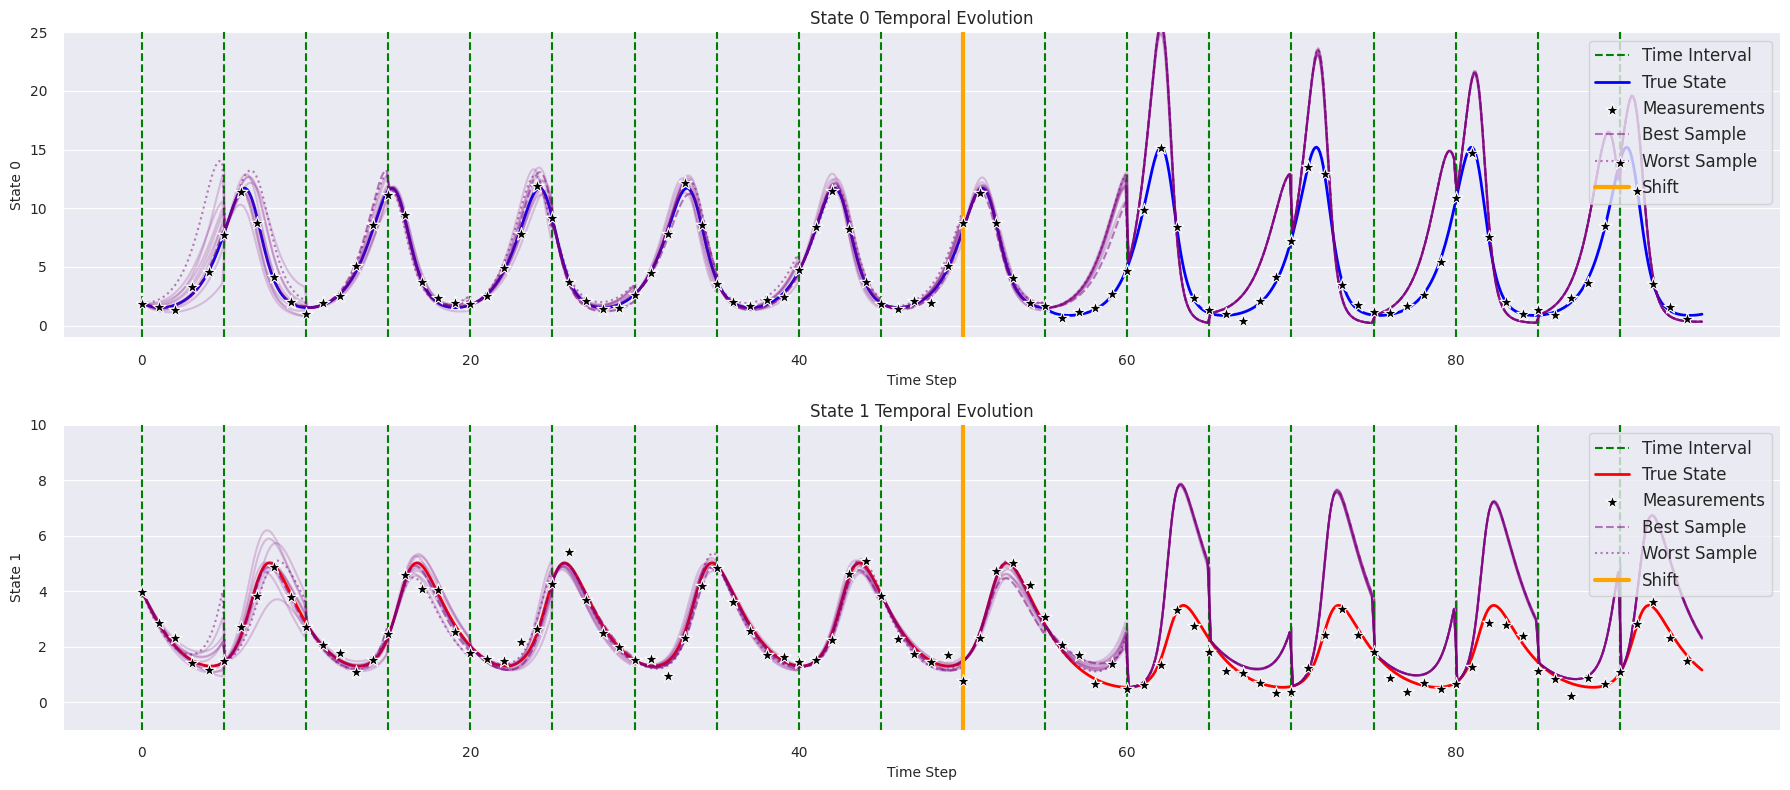

In [36]:
axs = plotter.plot_state_data(lvm_shift, window_type='line')
axs[0].set_ylim([-1, 25])
axs[1].set_ylim([-1, 10])

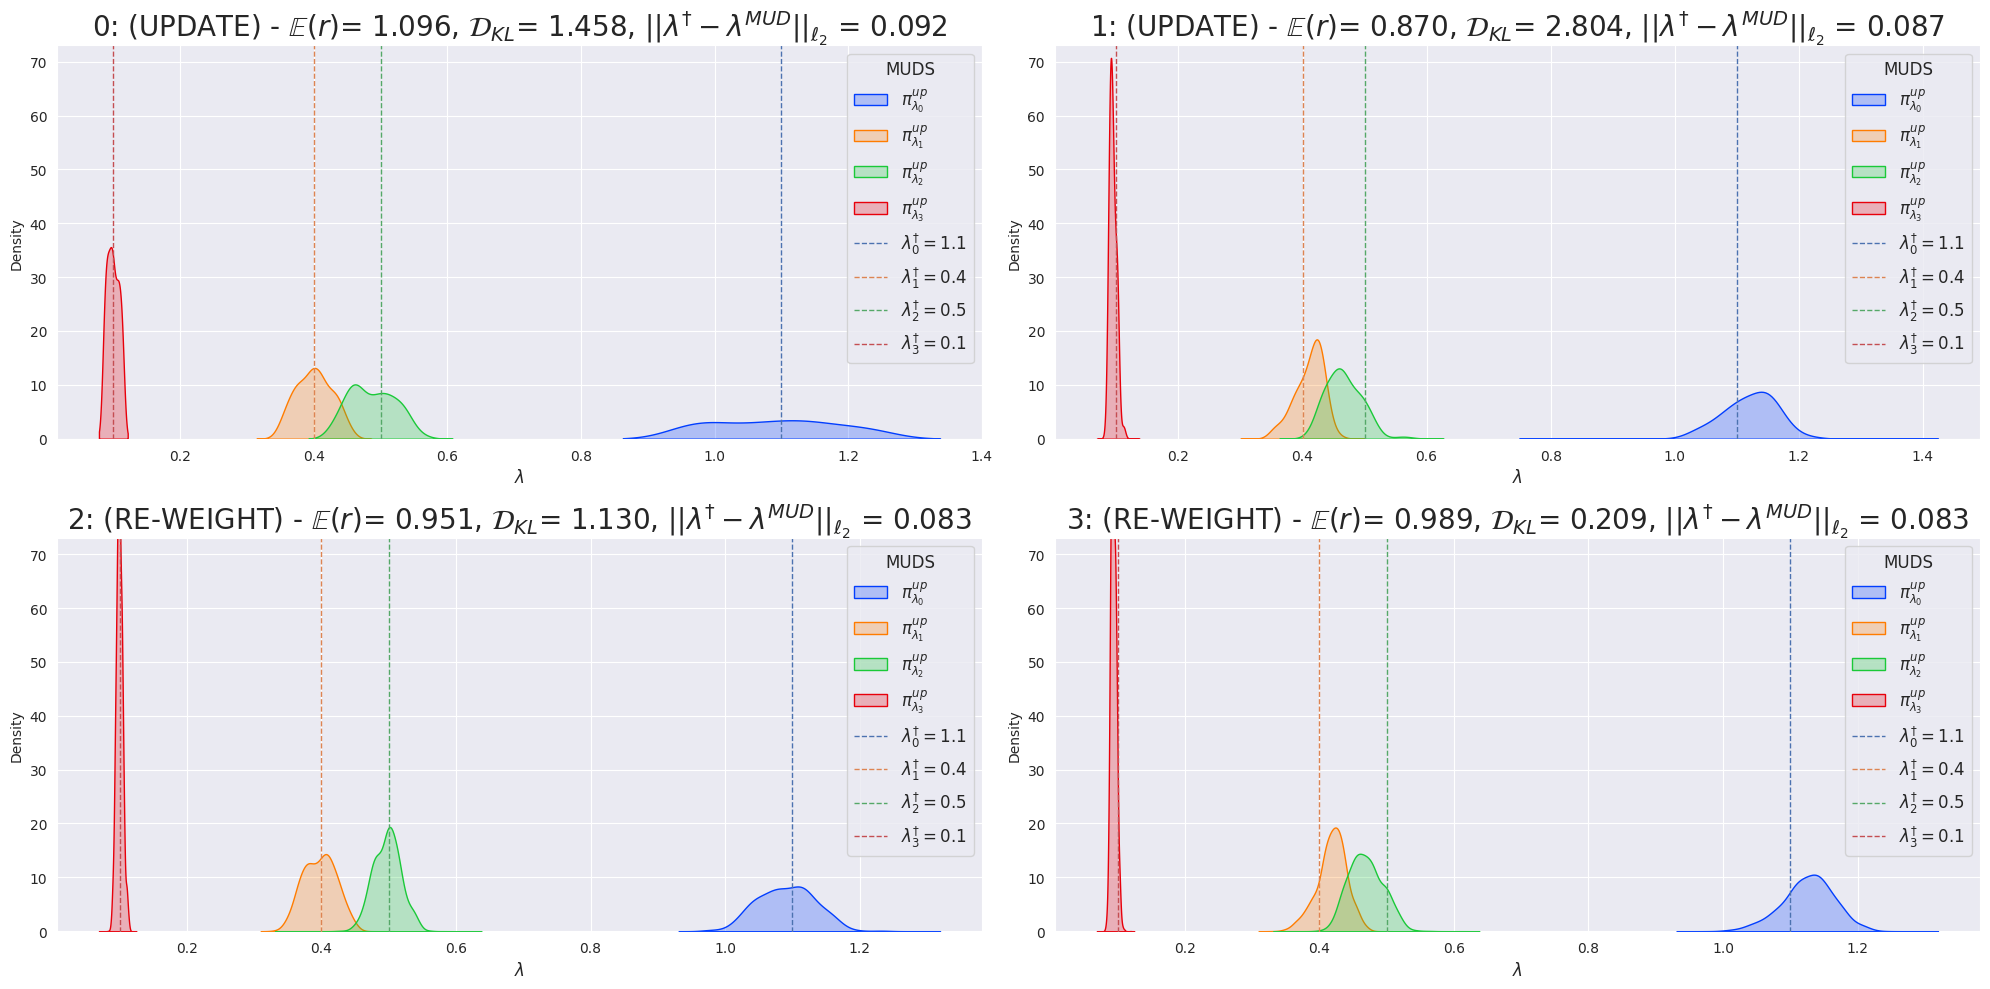

In [24]:
importlib.reload(plt)
plotter = plt.Plotter()

ax = plotter.plot_parameters(lvm, param_idxs=None, nrows=2, ncols=2, plot_initial=False, plot_legend=True)